In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table
import warnings
from typing import Dict
import re

warnings.filterwarnings("ignore")

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
file = 'stellar_samples.csv'

In [8]:
k2 = pd.read_csv(file)

In [9]:
k2

,EPIC,Campaign,CDPP1,CDPP1_5,CDPP2,CDPP2_5,CDPP3,CDPP4,CDPP5,CDPP6,CDPP7,CDPP8,CDPP9,CDPP10,SpT,RUWE,Ncomp,Rad,U_Rad,u_Rad,Teff,U_Teff,logg,U_logg,Mass,U_Mass,FeH,U_FeH,limb1,limb2,d_mag
0,201121245,1,257.151,236.598,226.563,209.841,191.452,174.727,171.493,155.131,149.860,144.238,141.405,133.911,G5,1.174929,0.0,4.415,0.348,0.329,4814,138,3.283,0.150,1.373,0.610,-0.100,0.235,0.6212,0.1129,0.0
1,201122454,1,268.578,248.491,225.499,214.708,198.934,183.430,183.657,170.828,173.404,180.913,183.539,172.220,K7,7.138988,0.0,0.950,0.078,0.071,4046,138,4.532,0.150,1.123,0.521,-0.161,0.235,0.4639,0.2589,0.0
2,201122521,1,486.386,450.572,368.257,355.254,328.753,295.503,264.617,253.877,242.677,221.716,213.211,211.158,G8,0.947940,0.0,2.522,0.287,0.247,5144,138,3.652,0.150,1.052,0.511,-0.375,0.235,0.4664,0.2249,0.0
3,201123619,1,639.118,587.075,533.719,479.562,471.031,425.428,373.952,361.346,343.016,318.207,315.377,314.689,M1,1.127277,0.0,0.528,0.017,0.017,3676,138,4.713,0.043,0.525,0.042,-0.038,0.235,0.4651,0.2700,0.0
4,201124136,1,102.980,96.421,87.393,88.527,81.895,78.648,71.903,72.715,72.086,71.319,68.591,72.448,K7,10.175707,0.0,0.602,0.046,0.041,4028,138,4.638,0.150,0.576,0.260,-0.475,0.235,0.3568,0.3354,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241334,211730267,18,208.273,206.536,177.306,175.085,170.118,140.380,153.043,160.229,139.191,150.403,131.543,137.804,K4,0.966075,0.0,0.995,0.068,0.062,5383,138,4.490,0.151,1.110,0.499,0.213,0.198,0.6767,0.0697,0.0
241335,211830266,18,846.281,825.627,736.583,626.123,610.549,520.170,467.402,431.880,402.149,381.403,367.534,354.297,M3,0.977467,0.0,1.598,0.129,0.115,4578,141,3.577,0.154,0.352,0.168,-0.214,0.250,0.3284,0.3566,0.0
241336,211914998,18,100.992,92.874,93.439,93.967,98.588,108.393,109.383,113.219,110.807,112.347,116.787,114.714,G4,0.976495,0.0,0.898,0.059,0.053,5539,138,4.420,0.151,0.779,0.352,-0.141,0.198,0.4415,0.2396,0.0
241337,211962097,18,295.027,358.410,294.420,299.896,309.960,312.412,273.927,267.456,274.259,275.153,270.212,311.431,F2,0.980242,0.0,2.174,0.144,0.132,6187,138,3.986,0.151,1.677,0.730,-0.194,0.198,0.3430,0.2667,0.0


In [10]:
k2 = k2.rename(columns={'EPIC': 'EPIC_ID'})

In [11]:
k2all = pd.read_csv('https://www.dropbox.com/scl/fi/ba9f1x2it1ukqar7xjlt8/k2all.csv?rlkey=a17ije9hsdle1t2ygr9v2izi5&st=rkx8dt2m&dl=1')

In [12]:
k2all

,EPIC_ID,Campaign,GaiaDR3,2MASS,RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,Dist,e_Dist,E_Dist,Teff,e_Teff,logg,e_logg,feh,e_feh,Lum,e_Lum,Rad,e_Rad,Mass,e_Mass,RUWE,non_single_star,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,BP-RP,BP-G,G-RP,RP-J,J-H,H-K,extinctionJ,extinctionH,extinctionK,absJ,e_absJ,absH,e_absH,absK,e_absK,BC,e_BC
0,201121245,1,3598701493287932544,2MASS J11471875-0600134,176.828104,0.433259,-6.003704,0.243416,520.059143,7.278503,6.073486,4902,143,3.416,0.066,-0.257,0.217,9.064502,0.684049,4.177,0.245,1.661,0.134,1.175,0,11.102720,0.002764,11.604373,0.002830,10.439149,0.003798,9.620,0.026,9.100,0.023,8.981,0.019,1.165,0.502,0.664,0.819,0.520,0.119,0.000,0.000,0.000,1.041,0.040,0.521,0.036,0.400,0.033,1.942,0.078
1,201122521,1,3598719154193454976,2MASS J11472021-0558179,176.834212,0.515459,-5.971652,0.287594,1847.470830,93.061530,97.159910,5094,149,3.784,0.094,-0.288,0.217,3.620656,0.499565,2.453,0.252,1.332,0.113,0.948,0,14.746737,0.002763,15.206782,0.003263,14.127944,0.003942,13.402,0.026,12.901,0.027,12.872,0.035,1.078,0.460,0.619,0.726,0.501,0.029,0.000,0.000,0.000,2.078,0.113,1.575,0.113,1.546,0.115,1.833,0.078
2,201123619,1,3598719497790839040,2MASS J11471186-0556382,176.799379,0.820013,-5.943897,0.406311,200.859985,1.906356,1.719025,3729,109,4.758,0.031,-0.633,0.217,0.047647,0.002202,0.500,0.015,0.519,0.019,1.127,0,15.143640,0.002773,16.153950,0.003832,14.147896,0.003945,12.855,0.024,12.285,0.023,12.060,0.024,2.006,1.010,0.996,1.293,0.570,0.225,0.000,0.000,0.000,6.337,0.031,5.771,0.031,5.546,0.030,2.505,0.041
3,201124275,1,3598743206010226560,2MASS J11445381-0555420,176.224230,0.370010,-5.928365,0.230490,532.702515,5.769959,7.512146,5942,174,4.706,0.079,-1.779,0.217,0.506598,0.046664,0.674,0.052,0.833,0.068,1.046,0,14.176920,0.002766,14.471922,0.002914,13.705976,0.003858,13.148,0.028,12.827,0.023,12.796,0.034,0.764,0.295,0.471,0.558,0.321,0.031,0.024,0.014,0.009,4.489,0.039,4.183,0.036,4.153,0.045,1.331,0.087
4,201126062,1,3598723620959410816,2MASS J11465755-0553007,176.739796,1.016033,-5.883488,0.543972,244.279556,3.241867,3.339600,3776,110,4.684,0.028,-0.831,0.217,0.075336,0.003976,0.577,0.018,0.593,0.022,1.634,0,15.078585,0.002775,16.049982,0.003648,14.098021,0.003892,12.867,0.022,12.223,0.023,12.006,0.021,1.952,0.971,0.981,1.231,0.644,0.217,0.000,0.000,0.000,5.930,0.036,5.285,0.037,5.070,0.036,2.482,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257482,212179420,18,678425788468626816,2MASS J08304609+2343144,127.692046,0.256701,23.720657,0.220915,929.733521,13.142090,14.060424,6219,182,4.124,0.065,-0.420,0.217,3.623429,0.252327,1.665,0.109,1.338,0.108,0.987,0,13.175423,0.002765,13.433455,0.002836,12.755074,0.003842,12.321,0.023,12.040,0.022,11.981,0.026,0.679,0.258,0.420,0.434,0.281,0.059,0.024,0.014,0.009,2.456,0.040,2.183,0.039,2.130,0.041,1.207,0.066
257483,212179600,18,678250004049172480,2MASS J08274958+2343309,126.956631,0.220381,23.725236,0.169956,1289.393310,26.359250,30.733280,4922,144,3.315,0.074,-0.170,0.217,13.001449,1.277752,4.907,0.377,1.819,0.149,0.936,0,12.659062,0.002763,13.158696,0.002855,12.003857,0.003792,11.169,0.022,10.664,0.020,10.579,0.017,1.156,0.500,0.655,0.835,0.505,0.085,0.000,0.000,0.000,0.617,0.054,0.111,0.054,0.025,0.053,1.939,0.091
257484,212179688,18,678241070517213056,2MASS J08263429+2343389,126.642887,0.320074,23.727465,0.213690,736.999084,8.799316,10.122925,5993,176,4.159,0.064,-0.167,0.217,2.875102,0.232305,1.560,0.102,1.262,0.103,0.924,0,12.899457,0.002767,13.192869,0.002824,12.445556,0.003797,11.932,0.020,11.659,0.028,11.614,0.025,0.748,0.293,0.454,0.514,0.273,0.045,0.024,0.014,0.009,2.572,0.034,2.308,0.040,2.268,0.037,1.315,0.076
257485,212179696,18,678230212839882112,2MASS J08270421+2343393,126.767550,0.392856,23.727629,0.291679,225.309784,1.121964,1.219345,4879

In [13]:
k2.columns

Index(['EPIC_ID', 'Campaign', 'CDPP1', 'CDPP1_5', 'CDPP2', 'CDPP2_5', 'CDPP3',
       'CDPP4', 'CDPP5', 'CDPP6', 'CDPP7', 'CDPP8', 'CDPP9', 'CDPP10', 'SpT',
       'RUWE', 'Ncomp', 'Rad', 'U_Rad', 'u_Rad', 'Teff', 'U_Teff', 'logg',
       'U_logg', 'Mass', 'U_Mass', 'FeH', 'U_FeH', 'limb1', 'limb2', 'd_mag'],
      dtype='object')

In [14]:
new_columns = [col for col in k2all.columns if col not in k2.columns]

In [15]:
new_columns

['GaiaDR3',
 '2MASS',
 'RAJ2000',
 'e_RAJ2000',
 'DEJ2000',
 'e_DEJ2000',
 'Dist',
 'e_Dist',
 'E_Dist',
 'e_Teff',
 'e_logg',
 'feh',
 'e_feh',
 'Lum',
 'e_Lum',
 'e_Rad',
 'e_Mass',
 'non_single_star',
 'Gmag',
 'e_Gmag',
 'BPmag',
 'e_BPmag',
 'RPmag',
 'e_RPmag',
 'Jmag',
 'e_Jmag',
 'Hmag',
 'e_Hmag',
 'Kmag',
 'e_Kmag',
 'BP-RP',
 'BP-G',
 'G-RP',
 'RP-J',
 'J-H',
 'H-K',
 'extinctionJ',
 'extinctionH',
 'extinctionK',
 'absJ',
 'e_absJ',
 'absH',
 'e_absH',
 'absK',
 'e_absK',
 'BC',
 'e_BC']

In [16]:
common_epic_ids = set(k2['EPIC_ID']).intersection(set(k2all['EPIC_ID']))

In [17]:
len(common_epic_ids)

206126

In [18]:
k2_updated = k2[k2['EPIC_ID'].isin(common_epic_ids)].copy()

In [19]:
k2_updated

,EPIC_ID,Campaign,CDPP1,CDPP1_5,CDPP2,CDPP2_5,CDPP3,CDPP4,CDPP5,CDPP6,CDPP7,CDPP8,CDPP9,CDPP10,SpT,RUWE,Ncomp,Rad,U_Rad,u_Rad,Teff,U_Teff,logg,U_logg,Mass,U_Mass,FeH,U_FeH,limb1,limb2,d_mag
0,201121245,1,257.151,236.598,226.563,209.841,191.452,174.727,171.493,155.131,149.860,144.238,141.405,133.911,G5,1.174929,0.0,4.415,0.348,0.329,4814,138,3.283,0.150,1.373,0.610,-0.100,0.235,0.6212,0.1129,0.0
2,201122521,1,486.386,450.572,368.257,355.254,328.753,295.503,264.617,253.877,242.677,221.716,213.211,211.158,G8,0.947940,0.0,2.522,0.287,0.247,5144,138,3.652,0.150,1.052,0.511,-0.375,0.235,0.4664,0.2249,0.0
3,201123619,1,639.118,587.075,533.719,479.562,471.031,425.428,373.952,361.346,343.016,318.207,315.377,314.689,M1,1.127277,0.0,0.528,0.017,0.017,3676,138,4.713,0.043,0.525,0.042,-0.038,0.235,0.4651,0.2700,0.0
5,201124275,1,318.189,290.435,247.494,226.639,216.320,191.155,194.745,172.046,163.704,162.496,153.891,145.076,F2,1.045741,0.0,0.702,0.023,0.022,5803,54,3.938,0.089,0.156,0.036,-1.904,0.052,0.3303,0.2676,0.0
10,201126062,1,508.280,490.850,461.111,464.825,448.749,427.476,411.245,430.483,406.875,420.975,406.456,425.315,M1,1.633868,0.0,0.609,0.020,0.021,3722,138,4.637,0.065,0.587,0.084,0.050,0.235,0.4996,0.2285,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241333,211724246,18,125.393,117.550,112.410,97.499,92.925,74.035,70.131,70.311,67.410,62.124,61.031,61.397,K1,0.978792,0.0,2.207,0.153,0.146,5878,138,3.977,0.151,1.677,0.759,0.016,0.198,0.4695,0.2240,0.0
241334,211730267,18,208.273,206.536,177.306,175.085,170.118,140.380,153.043,160.229,139.191,150.403,131.543,137.804,K4,0.966075,0.0,0.995,0.068,0.062,5383,138,4.490,0.151,1.110,0.499,0.213,0.198,0.6767,0.0697,0.0
241335,211830266,18,846.281,825.627,736.583,626.123,610.549,520.170,467.402,431.880,402.149,381.403,367.534,354.297,M3,0.977467,0.0,1.598,0.129,0.115,4578,141,3.577,0.154,0.352,0.168,-0.214,0.250,0.3284,0.3566,0.0
241336,211914998,18,100.992,92.874,93.439,93.967,98.588,108.393,109.383,113.219,110.807,112.347,116.787,114.714,G4,0.976495,0.0,0.898,0.059,0.053,5539,138,4.420,0.151,0.779,0.352,-0.141,0.198,0.4415,0.2396,0.0


In [20]:
k2all = k2all[k2all['EPIC_ID'].isin(common_epic_ids)].drop_duplicates(subset=['EPIC_ID'])

In [21]:
k2_updated = k2_updated.merge(k2all[['EPIC_ID','GaiaDR3']], on='EPIC_ID', how='left')

In [22]:
k2_updated.columns

Index(['EPIC_ID', 'Campaign', 'CDPP1', 'CDPP1_5', 'CDPP2', 'CDPP2_5', 'CDPP3',
       'CDPP4', 'CDPP5', 'CDPP6', 'CDPP7', 'CDPP8', 'CDPP9', 'CDPP10', 'SpT',
       'RUWE', 'Ncomp', 'Rad', 'U_Rad', 'u_Rad', 'Teff', 'U_Teff', 'logg',
       'U_logg', 'Mass', 'U_Mass', 'FeH', 'U_FeH', 'limb1', 'limb2', 'd_mag',
       'GaiaDR3'],
      dtype='object')

In [23]:
k2_updated

,EPIC_ID,Campaign,CDPP1,CDPP1_5,CDPP2,CDPP2_5,CDPP3,CDPP4,CDPP5,CDPP6,CDPP7,CDPP8,CDPP9,CDPP10,SpT,RUWE,Ncomp,Rad,U_Rad,u_Rad,Teff,U_Teff,logg,U_logg,Mass,U_Mass,FeH,U_FeH,limb1,limb2,d_mag,GaiaDR3
0,201121245,1,257.151,236.598,226.563,209.841,191.452,174.727,171.493,155.131,149.860,144.238,141.405,133.911,G5,1.174929,0.0,4.415,0.348,0.329,4814,138,3.283,0.150,1.373,0.610,-0.100,0.235,0.6212,0.1129,0.0,3598701493287932544
1,201122521,1,486.386,450.572,368.257,355.254,328.753,295.503,264.617,253.877,242.677,221.716,213.211,211.158,G8,0.947940,0.0,2.522,0.287,0.247,5144,138,3.652,0.150,1.052,0.511,-0.375,0.235,0.4664,0.2249,0.0,3598719154193454976
2,201123619,1,639.118,587.075,533.719,479.562,471.031,425.428,373.952,361.346,343.016,318.207,315.377,314.689,M1,1.127277,0.0,0.528,0.017,0.017,3676,138,4.713,0.043,0.525,0.042,-0.038,0.235,0.4651,0.2700,0.0,3598719497790839040
3,201124275,1,318.189,290.435,247.494,226.639,216.320,191.155,194.745,172.046,163.704,162.496,153.891,145.076,F2,1.045741,0.0,0.702,0.023,0.022,5803,54,3.938,0.089,0.156,0.036,-1.904,0.052,0.3303,0.2676,0.0,3598743206010226560
4,201126062,1,508.280,490.850,461.111,464.825,448.749,427.476,411.245,430.483,406.875,420.975,406.456,425.315,M1,1.633868,0.0,0.609,0.020,0.021,3722,138,4.637,0.065,0.587,0.084,0.050,0.235,0.4996,0.2285,0.0,3598723620959410816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206121,211724246,18,125.393,117.550,112.410,97.499,92.925,74.035,70.131,70.311,67.410,62.124,61.031,61.397,K1,0.978792,0.0,2.207,0.153,0.146,5878,138,3.977,0.151,1.677,0.759,0.016,0.198,0.4695,0.2240,0.0,658130865403183872
206122,211730267,18,208.273,206.536,177.306,175.085,170.118,140.380,153.043,160.229,139.191,150.403,131.543,137.804,K4,0.966075,0.0,0.995,0.068,0.062,5383,138,4.490,0.151,1.110,0.499,0.213,0.198,0.6767,0.0697,0.0,610181468257262464
206123,211830266,18,846.281,825.627,736.583,626.123,610.549,520.170,467.402,431.880,402.149,381.403,367.534,354.297,M3,0.977467,0.0,1.598,0.129,0.115,4578,141,3.577,0.154,0.352,0.168,-0.214,0.250,0.3284,0.3566,0.0,657247717049167488
206124,211914998,18,100.992,92.874,93.439,93.967,98.588,108.393,109.383,113.219,110.807,112.347,116.787,114.714,G4,0.976495,0.0,0.898,0.059,0.053,5539,138,4.420,0.151,0.779,0.352,-0.141,0.198,0.4415,0.2396,0.0,660400738439361280


In [24]:
# Cast GaiaDR3 IDs as strings
k2_updated['GaiaDR3'] = k2_updated['GaiaDR3'].astype('|S').str.decode('utf-8')

In [25]:
# Read in APOGEE DR17 data
data = Table.read('https://portal.nersc.gov/project/cosmo/data/sdss/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/allStarLite-dr17-synspec_rev1.fits', format='fits', hdu=1)
del data['PARAMFLAG', 'X_H', 'X_H_ERR', 'X_M', 'X_M_ERR', 'ELEM_CHI2', 'ELEMFRAC', 'X_H_SPEC', 'X_M_SPEC']
df = data.to_pandas()

In [26]:
df.columns

Index(['APOGEE_ID', 'TELESCOPE', 'FIELD', 'ALT_ID', 'RA', 'DEC', 'GLON',
       'GLAT', 'J', 'J_ERR',
       ...
       'NI_FE_ERR', 'NI_FE_FLAG', 'CU_FE', 'CU_FE_SPEC', 'CU_FE_ERR',
       'CU_FE_FLAG', 'CE_FE', 'CE_FE_SPEC', 'CE_FE_ERR', 'CE_FE_FLAG'],
      dtype='object', length=182)

In [27]:
# Make some quality cuts
dfq = df[(df['SNR']>100)]

In [28]:
print(df.columns.tolist())

['APOGEE_ID', 'TELESCOPE', 'FIELD', 'ALT_ID', 'RA', 'DEC', 'GLON', 'GLAT', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR', 'AK_TARG', 'AK_TARG_METHOD', 'AK_WISE', 'SFD_EBV', 'APOGEE_TARGET1', 'APOGEE_TARGET2', 'APOGEE2_TARGET1', 'APOGEE2_TARGET2', 'APOGEE2_TARGET3', 'APOGEE2_TARGET4', 'TARGFLAGS', 'SURVEY', 'PROGRAMNAME', 'NVISITS', 'SNR', 'SNREV', 'STARFLAG', 'STARFLAGS', 'ANDFLAG', 'ANDFLAGS', 'VHELIO_AVG', 'VSCATTER', 'VERR', 'RV_TEFF', 'RV_LOGG', 'RV_FEH', 'RV_ALPHA', 'RV_CARB', 'RV_CHI2', 'RV_CCFWHM', 'RV_AUTOFWHM', 'RV_FLAG', 'N_COMPONENTS', 'MEANFIB', 'SIGFIB', 'MIN_H', 'MAX_H', 'MIN_JK', 'MAX_JK', 'GAIAEDR3_SOURCE_ID', 'GAIAEDR3_PARALLAX', 'GAIAEDR3_PARALLAX_ERROR', 'GAIAEDR3_PMRA', 'GAIAEDR3_PMRA_ERROR', 'GAIAEDR3_PMDEC', 'GAIAEDR3_PMDEC_ERROR', 'GAIAEDR3_PHOT_G_MEAN_MAG', 'GAIAEDR3_PHOT_BP_MEAN_MAG', 'GAIAEDR3_PHOT_RP_MEAN_MAG', 'GAIAEDR3_DR2_RADIAL_VELOCITY', 'GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR', 'GAIAEDR3_R_MED_GEO', 'GAIAEDR3_R_LO_GEO', 'GAIAEDR3_R_HI_GEO', 'GAIAEDR3_R_MED_PHOTO

In [29]:
# Drop targets with bad stellar parameters
dfq.dropna(subset=['TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'M_H', 'M_H_ERR', 'FE_H', 'FE_H_ERR'],inplace=True)
dfq = dfq.sort_values(by='SNR',ascending=False)

In [30]:
# Keep highest SNR spectrum if multiples exist
dfq.drop_duplicates(subset='GAIAEDR3_SOURCE_ID',inplace=True)
dfq.reset_index(inplace=True,drop=True)

In [31]:
print(dfq.columns.tolist())

['APOGEE_ID', 'TELESCOPE', 'FIELD', 'ALT_ID', 'RA', 'DEC', 'GLON', 'GLAT', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR', 'AK_TARG', 'AK_TARG_METHOD', 'AK_WISE', 'SFD_EBV', 'APOGEE_TARGET1', 'APOGEE_TARGET2', 'APOGEE2_TARGET1', 'APOGEE2_TARGET2', 'APOGEE2_TARGET3', 'APOGEE2_TARGET4', 'TARGFLAGS', 'SURVEY', 'PROGRAMNAME', 'NVISITS', 'SNR', 'SNREV', 'STARFLAG', 'STARFLAGS', 'ANDFLAG', 'ANDFLAGS', 'VHELIO_AVG', 'VSCATTER', 'VERR', 'RV_TEFF', 'RV_LOGG', 'RV_FEH', 'RV_ALPHA', 'RV_CARB', 'RV_CHI2', 'RV_CCFWHM', 'RV_AUTOFWHM', 'RV_FLAG', 'N_COMPONENTS', 'MEANFIB', 'SIGFIB', 'MIN_H', 'MAX_H', 'MIN_JK', 'MAX_JK', 'GAIAEDR3_SOURCE_ID', 'GAIAEDR3_PARALLAX', 'GAIAEDR3_PARALLAX_ERROR', 'GAIAEDR3_PMRA', 'GAIAEDR3_PMRA_ERROR', 'GAIAEDR3_PMDEC', 'GAIAEDR3_PMDEC_ERROR', 'GAIAEDR3_PHOT_G_MEAN_MAG', 'GAIAEDR3_PHOT_BP_MEAN_MAG', 'GAIAEDR3_PHOT_RP_MEAN_MAG', 'GAIAEDR3_DR2_RADIAL_VELOCITY', 'GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR', 'GAIAEDR3_R_MED_GEO', 'GAIAEDR3_R_LO_GEO', 'GAIAEDR3_R_HI_GEO', 'GAIAEDR3_R_MED_PHOTO

In [32]:
apogee = dfq[['APOGEE_ID', 'TEFF', 'TEFF_ERR', 'LOGG',
       'LOGG_ERR', 'M_H', 'M_H_ERR', 'FE_H', 'FE_H_ERR', 
       'VSINI', 'C_FE', 'C_FE_ERR', 'O_FE', 'O_FE_ERR', 
       'NA_FE', 'NA_FE_ERR', 'MG_FE', 'MG_FE_ERR',
       'SI_FE', 'SI_FE_ERR', 'S_FE', 'S_FE_ERR', 
       'CA_FE', 'CA_FE_ERR', 'TI_FE', 'TI_FE_ERR',
       'GAIAEDR3_SOURCE_ID']].copy()

In [33]:
apogee['GAIAEDR3_SOURCE_ID']

0         1769924725255921408
1         4655052273182210688
2         1262018454225426432
3         4419921058716499968
4         3974613764225607936
                 ...         
422505     335835042043520896
422506    3951123110615330048
422507    3665582552221640448
422508    6727062075794237056
422509    4280758002292391040
Name: GAIAEDR3_SOURCE_ID, Length: 422510, dtype: int64

In [34]:
column_mapping = {
    "GAIAEDR3_SOURCE_ID": "GaiaDR3",
    "TEFF":"apogee_teff",
    "TEFF_ERR":"apogee_e_teff",
    "LOGG":"apogee_logg",
    "LOGG_ERR":"apogee_e_logg",
    "FE_H":"apogee_fe_h",
    "FE_H_ERR":"apogee_e_fe_h",
    'C_FE': 'apogee_c_fe',
    'C_FE_ERR': 'apogee_e_c_fe',
    'O_FE': 'apogee_o_fe',
    'O_FE_ERR': 'apogee_e_o_fe',
    'NA_FE': 'apogee_na_fe',
    'NA_FE_ERR': 'apogee_e_na_fe',
    'MG_FE': 'apogee_mg_fe',
    'MG_FE_ERR': 'apogee_e_mg_fe',
    'SI_FE': 'apogee_si_fe',
    'SI_FE_ERR': 'apogee_e_si_fe',
    'S_FE': 'apogee_s_fe',
    'S_FE_ERR': 'apogee_e_s_fe',
    'CA_FE': 'apogee_ca_fe',
    'CA_FE_ERR': 'apogee_e_ca_fe',
    'TI_FE': 'apogee_ti_fe',
    'TI_FE_ERR': 'apogee_e_ti_fe'
}

In [35]:
apogee = apogee.rename(columns=column_mapping)

In [36]:
apogee['GaiaDR3']

0         1769924725255921408
1         4655052273182210688
2         1262018454225426432
3         4419921058716499968
4         3974613764225607936
                 ...         
422505     335835042043520896
422506    3951123110615330048
422507    3665582552221640448
422508    6727062075794237056
422509    4280758002292391040
Name: GaiaDR3, Length: 422510, dtype: int64

In [37]:
# apogee.dropna(inplace=True)
# apogee.reset_index(inplace=True,drop=True)

# Cast names as strings
apogee['APOGEE_ID'] = apogee['APOGEE_ID'].str.decode('utf-8')
apogee['GaiaDR3'] = apogee['GaiaDR3'].astype('|S').str.decode('utf-8')

In [38]:
apogee

,APOGEE_ID,apogee_teff,apogee_e_teff,apogee_logg,apogee_e_logg,M_H,M_H_ERR,apogee_fe_h,apogee_e_fe_h,VSINI,apogee_c_fe,apogee_e_c_fe,apogee_o_fe,apogee_e_o_fe,apogee_na_fe,apogee_e_na_fe,apogee_mg_fe,apogee_e_mg_fe,apogee_si_fe,apogee_e_si_fe,apogee_s_fe,apogee_e_s_fe,apogee_ca_fe,apogee_e_ca_fe,apogee_ti_fe,apogee_e_ti_fe,GaiaDR3
0,2M21342357+1215247,5849.514648,30.970270,3.770495,0.022910,-0.128900,0.005534,-0.111000,0.005964,6.071976,0.064557,0.039481,0.084793,0.070356,0.032714,0.150773,-0.079752,0.012330,0.099471,0.012716,0.076392,0.045297,-0.075809,0.012410,-0.701641,0.071554,1769924725255921408
1,2M05003947-7037264,6564.755371,61.669910,3.845554,0.030657,-0.349520,0.009302,-0.313090,0.006454,63.562359,0.139080,0.099530,-0.247777,0.259943,0.477625,0.340382,-0.180182,0.015494,0.051716,0.016442,0.289182,0.051560,-0.305124,0.017867,-0.304261,0.160484,4655052273182210688
2,2M15044648+2224548,6358.979492,45.185886,4.373098,0.023858,-0.090514,0.005366,-0.090422,0.005243,16.500608,-0.028151,0.061618,0.059653,0.150990,-0.011834,0.202246,-0.111833,0.012223,0.027519,0.013124,0.001648,0.042893,-0.023118,0.012790,0.047965,0.109109,1262018454225426432
3,2M15145309+0116160,6028.295410,37.779453,3.719655,0.025628,-0.230090,0.005871,-0.235660,0.006354,30.095392,0.058884,0.052171,0.072059,0.101356,-0.015926,0.197697,-0.038542,0.012984,0.079937,0.013500,0.103832,0.048252,-0.130904,0.013855,-0.534911,0.090714,4419921058716499968
4,2M11540771+1810106,6159.069824,39.814457,4.018009,0.024246,-0.143130,0.005276,-0.144170,0.005715,9.559826,0.036753,0.053812,0.091350,0.115468,-0.108326,0.190419,-0.069701,0.012364,0.115460,0.013052,0.057421,0.044984,-0.021926,0.012940,-0.386411,0.095177,3974613764225607936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422505,2M02472336+3953313,3951.980225,9.679768,4.643898,0.024216,-0.129250,0.011331,-0.113590,0.012038,1.514956,-0.013277,0.014963,-0.045243,0.013118,NaN,NaN,-0.105881,0.018607,-0.060917,0.018589,NaN,NaN,-0.041095,0.017846,-0.209851,0.023178,335835042043520896
422506,2M12031095+1929275,3873.359131,8.629295,4.635020,0.021433,0.131330,0.010216,0.142680,0.010854,1.821755,0.009443,0.012872,-0.058860,0.011653,NaN,NaN,-0.094261,0.017970,-0.094827,0.018611,NaN,NaN,-0.061694,0.016336,-0.183951,0.020291,3951123110615330048
422507,2M13541991+0329314,5949.259277,49.728352,4.229080,0.038459,-0.286660,0.009550,-0.289780,0.010500,3.902384,-0.055299,0.078985,0.011635,0.164856,0.406505,0.310227,0.012963,0.020063,0.105366,0.023245,-0.018947,0.081878,-0.146501,0.025291,NaN,NaN,3665582552221640448
422508,2M18231360-3841159,4581.188477,14.570274,4.524949,0.025307,-0.068447,0.009799,-0.073833,0.010498,4.309035,0.016414,0.018639,-0.014708,0.018086,0.246552,0.084677,-0.003884,0.017794,-0.008767,0.018546,NaN,NaN,0.022700,0.017574,-0.078644,0.033477,6727062075794237056


In [39]:
common_gaia_ids_apogee = set(k2_updated['GaiaDR3']).intersection(set(apogee['GaiaDR3']))

In [40]:
len(common_gaia_ids_apogee)

27390

In [41]:
# Read in GALAH DR3 data
dr3_main = Table.read('https://cloud.datacentral.org.au/teamdata/GALAH/public/GALAH_DR3/GALAH_DR3_main_allstar_v2.fits', format='fits', hdu=1)

In [42]:
dr3 = np.array(dr3_main['star_id', 'sobject_id', 'dr2_source_id', 'dr3_source_id', 'survey_name', 'field_id', 'flag_repeat', 'wg4_field', 'wg4_pipeline', 'flag_sp', 'teff', 'e_teff', 'irfm_teff', 'irfm_ebv', 'irfm_ebv_ref', 'logg', 'e_logg', 'fe_h', 'e_fe_h', 'flag_fe_h', 'fe_h_atmo', 'vmic', 'vbroad', 'e_vbroad', 'chi2_sp', 'alpha_fe', 'e_alpha_fe', 'nr_alpha_fe', 'flag_alpha_fe', 'flux_A_Fe', 'chi_A_Fe', 'Li_fe', 'e_Li_fe', 'nr_Li_fe', 'flag_Li_fe', 'C_fe', 'e_C_fe', 'nr_C_fe', 'flag_C_fe', 'O_fe', 'e_O_fe', 'nr_O_fe', 'flag_O_fe', 'Na_fe', 'e_Na_fe', 'nr_Na_fe', 'flag_Na_fe', 'Mg_fe', 'e_Mg_fe', 'nr_Mg_fe', 'flag_Mg_fe', 'Al_fe', 'e_Al_fe', 'nr_Al_fe', 'flag_Al_fe', 'Si_fe', 'e_Si_fe', 'nr_Si_fe', 'flag_Si_fe', 'K_fe', 'e_K_fe', 'nr_K_fe', 'flag_K_fe', 'Ca_fe', 'e_Ca_fe', 'nr_Ca_fe', 'flag_Ca_fe', 'Sc_fe', 'e_Sc_fe', 'nr_Sc_fe', 'flag_Sc_fe', 'Sc2_fe', 'e_Sc2_fe', 'nr_Sc2_fe', 'flag_Sc2_fe', 'Ti_fe', 'e_Ti_fe', 'nr_Ti_fe', 'flag_Ti_fe', 'Ti2_fe', 'e_Ti2_fe', 'nr_Ti2_fe', 'flag_Ti2_fe', 'V_fe', 'e_V_fe', 'nr_V_fe', 'flag_V_fe', 'Cr_fe', 'e_Cr_fe', 'nr_Cr_fe', 'flag_Cr_fe', 'Cr2_fe', 'e_Cr2_fe', 'nr_Cr2_fe', 'flag_Cr2_fe', 'Mn_fe', 'e_Mn_fe', 'nr_Mn_fe', 'flag_Mn_fe', 'Co_fe', 'e_Co_fe', 'nr_Co_fe', 'flag_Co_fe', 'Ni_fe', 'e_Ni_fe', 'nr_Ni_fe', 'flag_Ni_fe', 'Cu_fe', 'e_Cu_fe', 'nr_Cu_fe', 'flag_Cu_fe', 'Zn_fe', 'e_Zn_fe', 'nr_Zn_fe', 'flag_Zn_fe', 'Rb_fe', 'e_Rb_fe', 'nr_Rb_fe', 'flag_Rb_fe', 'Sr_fe', 'e_Sr_fe', 'nr_Sr_fe', 'flag_Sr_fe', 'Y_fe', 'e_Y_fe', 'nr_Y_fe', 'flag_Y_fe', 'Zr_fe', 'e_Zr_fe', 'nr_Zr_fe', 'flag_Zr_fe', 'Mo_fe', 'e_Mo_fe', 'nr_Mo_fe', 'flag_Mo_fe', 'Ru_fe', 'e_Ru_fe', 'nr_Ru_fe', 'flag_Ru_fe', 'Ba_fe', 'e_Ba_fe', 'nr_Ba_fe', 'flag_Ba_fe', 'La_fe', 'e_La_fe', 'nr_La_fe', 'flag_La_fe', 'Ce_fe', 'e_Ce_fe', 'nr_Ce_fe', 'flag_Ce_fe', 'Nd_fe', 'e_Nd_fe', 'nr_Nd_fe', 'flag_Nd_fe', 'Sm_fe', 'e_Sm_fe', 'nr_Sm_fe', 'flag_Sm_fe', 'Eu_fe', 'e_Eu_fe', 'nr_Eu_fe', 'flag_Eu_fe', 'ra_dr2', 'dec_dr2', 'parallax_dr2', 'parallax_error_dr2', 'r_est_dr2', 'r_lo_dr2', 'r_hi_dr2', 'r_len_dr2', 'rv_galah', 'e_rv_galah', 'rv_gaia_dr2', 'e_rv_gaia_dr2', 'red_flag', 'ebv', 'snr_c1_iraf', 'snr_c2_iraf', 'snr_c3_iraf', 'snr_c4_iraf', 'flag_guess', 'v_jk', 'j_m', 'j_msigcom', 'h_m', 'h_msigcom', 'ks_m', 'ks_msigcom', 'ph_qual_tmass', 'w2mpro', 'w2mpro_error', 'ph_qual_wise', 'a_ks', 'e_a_ks', 'bc_ks', 'ruwe_dr2'])
df = pd.DataFrame(dr3,columns=['star_id', 'sobject_id', 'dr2_source_id', 'dr3_source_id', 'survey_name', 'field_id', 'flag_repeat', 'wg4_field', 'wg4_pipeline', 'flag_sp', 'teff', 'e_teff', 'irfm_teff', 'irfm_ebv', 'irfm_ebv_ref', 'logg', 'e_logg', 'fe_h', 'e_fe_h', 'flag_fe_h', 'fe_h_atmo', 'vmic', 'vbroad', 'e_vbroad', 'chi2_sp', 'alpha_fe', 'e_alpha_fe', 'nr_alpha_fe', 'flag_alpha_fe', 'flux_A_Fe', 'chi_A_Fe', 'Li_fe', 'e_Li_fe', 'nr_Li_fe', 'flag_Li_fe', 'C_fe', 'e_C_fe', 'nr_C_fe', 'flag_C_fe', 'O_fe', 'e_O_fe', 'nr_O_fe', 'flag_O_fe', 'Na_fe', 'e_Na_fe', 'nr_Na_fe', 'flag_Na_fe', 'Mg_fe', 'e_Mg_fe', 'nr_Mg_fe', 'flag_Mg_fe', 'Al_fe', 'e_Al_fe', 'nr_Al_fe', 'flag_Al_fe', 'Si_fe', 'e_Si_fe', 'nr_Si_fe', 'flag_Si_fe', 'K_fe', 'e_K_fe', 'nr_K_fe', 'flag_K_fe', 'Ca_fe', 'e_Ca_fe', 'nr_Ca_fe', 'flag_Ca_fe', 'Sc_fe', 'e_Sc_fe', 'nr_Sc_fe', 'flag_Sc_fe', 'Sc2_fe', 'e_Sc2_fe', 'nr_Sc2_fe', 'flag_Sc2_fe', 'Ti_fe', 'e_Ti_fe', 'nr_Ti_fe', 'flag_Ti_fe', 'Ti2_fe', 'e_Ti2_fe', 'nr_Ti2_fe', 'flag_Ti2_fe', 'V_fe', 'e_V_fe', 'nr_V_fe', 'flag_V_fe', 'Cr_fe', 'e_Cr_fe', 'nr_Cr_fe', 'flag_Cr_fe', 'Cr2_fe', 'e_Cr2_fe', 'nr_Cr2_fe', 'flag_Cr2_fe', 'Mn_fe', 'e_Mn_fe', 'nr_Mn_fe', 'flag_Mn_fe', 'Co_fe', 'e_Co_fe', 'nr_Co_fe', 'flag_Co_fe', 'Ni_fe', 'e_Ni_fe', 'nr_Ni_fe', 'flag_Ni_fe', 'Cu_fe', 'e_Cu_fe', 'nr_Cu_fe', 'flag_Cu_fe', 'Zn_fe', 'e_Zn_fe', 'nr_Zn_fe', 'flag_Zn_fe', 'Rb_fe', 'e_Rb_fe', 'nr_Rb_fe', 'flag_Rb_fe', 'Sr_fe', 'e_Sr_fe', 'nr_Sr_fe', 'flag_Sr_fe', 'Y_fe', 'e_Y_fe', 'nr_Y_fe', 'flag_Y_fe', 'Zr_fe', 'e_Zr_fe', 'nr_Zr_fe', 'flag_Zr_fe', 'Mo_fe', 'e_Mo_fe', 'nr_Mo_fe', 'flag_Mo_fe', 'Ru_fe', 'e_Ru_fe', 'nr_Ru_fe', 'flag_Ru_fe', 'Ba_fe', 'e_Ba_fe', 'nr_Ba_fe', 'flag_Ba_fe', 'La_fe', 'e_La_fe', 'nr_La_fe', 'flag_La_fe', 'Ce_fe', 'e_Ce_fe', 'nr_Ce_fe', 'flag_Ce_fe', 'Nd_fe', 'e_Nd_fe', 'nr_Nd_fe', 'flag_Nd_fe', 'Sm_fe', 'e_Sm_fe', 'nr_Sm_fe', 'flag_Sm_fe', 'Eu_fe', 'e_Eu_fe', 'nr_Eu_fe', 'flag_Eu_fe', 'ra_dr2', 'dec_dr2', 'parallax_dr2', 'parallax_error_dr2', 'r_est_dr2', 'r_lo_dr2', 'r_hi_dr2', 'r_len_dr2', 'rv_galah', 'e_rv_galah', 'rv_gaia_dr2', 'e_rv_gaia_dr2', 'red_flag', 'ebv', 'snr_c1_iraf', 'snr_c2_iraf', 'snr_c3_iraf', 'snr_c4_iraf', 'flag_guess', 'v_jk', 'j_m', 'j_msigcom', 'h_m', 'h_msigcom', 'ks_m', 'ks_msigcom', 'ph_qual_tmass', 'w2mpro', 'w2mpro_error', 'ph_qual_wise', 'a_ks', 'e_a_ks', 'bc_ks', 'ruwe_dr2'])

In [43]:
# Set quality cuts
unflagged_stellar_parameters = (dr3_main['flag_sp'] == 0)
dfc = df[df['flag_sp']==0]
dfc = dfc[(dfc['snr_c1_iraf']>20) | (dfc['snr_c2_iraf']>20) | (dfc['snr_c3_iraf']>20) | (dfc['snr_c4_iraf']>20)]
dfc.reset_index(inplace=True,drop=True)

In [47]:
galah = dfc[['star_id', 'dr2_source_id', 'dr3_source_id', 'teff', 'e_teff', 'logg', 'e_logg', 
             'fe_h', 'e_fe_h', 'alpha_fe', 'e_alpha_fe', 'Li_fe', 'e_Li_fe', 'C_fe', 'e_C_fe', 'O_fe', 'e_O_fe',
             'Na_fe', 'e_Na_fe', 'Mg_fe', 'e_Mg_fe', 'Si_fe', 'e_Si_fe', 'Ca_fe', 'e_Ca_fe','Ti_fe', 'e_Ti_fe']].copy()

In [48]:
column_mapping = {
    "star_id": "GALAH_ID",
    "dr2_source_id": "GaiaDR2",
    "dr3_source_id": "GaiaDR3",
    'teff':"galah_teff",
    "e_teff":"galah_e_teff",
    "logg":"galah_logg",
    "e_logg":"galah_e_logg",
    "fe_h":"galah_fe_h",
    "e_fe_h":"galah_e_fe_h",
    "alpha_fe":"galah_alpha_fe",
    "e_alpha_fe":"galah_e_alpha_fe",
    "Li_fe":"galah_li_fe",
    "e_Li_fe":"galah_e_li_fe",
    'C_fe': 'galah_c_fe',
    'e_C_fe': 'galah_e_c_fe',
    'O_fe': 'galah_o_fe',
    'e_O_fe': 'galah_e_o_fe',
    'Na_fe': 'galah_na_fe',
    'e_Na_fe': 'galah_e_na_fe',
    'Mg_fe': 'galah_mg_fe',
    'e_Mg_fe': 'galah_e_mg_fe',
    'Si_fe': 'galah_si_fe',
    'e_Si_fe': 'galah_e_si_fe',
    'Ca_fe': 'galah_ca_fe',
    'e_Ca_fe': 'galah_e_ca_fe',
    'Ti_fe': 'galah_ti_fe',
    'e_Ti_fe': 'galah_e_ti_fe'
}

In [49]:
# Keep only the columns you need
galah = galah.rename(columns=column_mapping)
# galah.dropna(inplace=True)
# galah.reset_index(inplace=True,drop=True)

# Fix the utf encoding b string for the star_id
galah['GALAH_ID'] = galah['GALAH_ID'].str.decode('utf-8')
galah['GaiaDR3'] = galah['GaiaDR3'].astype('|S').str.decode('utf-8')

In [50]:
galah.columns

Index(['GALAH_ID', 'GaiaDR2', 'GaiaDR3', 'galah_teff', 'galah_e_teff',
       'galah_logg', 'galah_e_logg', 'galah_fe_h', 'galah_e_fe_h',
       'galah_alpha_fe', 'galah_e_alpha_fe', 'galah_li_fe', 'galah_e_li_fe',
       'galah_c_fe', 'galah_e_c_fe', 'galah_o_fe', 'galah_e_o_fe',
       'galah_na_fe', 'galah_e_na_fe', 'galah_mg_fe', 'galah_e_mg_fe',
       'galah_si_fe', 'galah_e_si_fe', 'galah_ca_fe', 'galah_e_ca_fe',
       'galah_ti_fe', 'galah_e_ti_fe'],
      dtype='object')

In [51]:
common_gaia_ids_galah = set(k2_updated['GaiaDR3']).intersection(set(galah['GaiaDR3']))
len(common_gaia_ids_galah)

33272

In [52]:
# Read in LAMOST DR8 AFGK data
df = pd.read_csv("/Users/sabina/Desktop/GitHub/K2-abundances/do-not-add/lamostdr8_mrs_parameters_abudances.csv", header=0, sep=',', dtype={'gaia_source_id': str})

In [53]:
df

,StarID,medID,Gaia_source_id,RA,Dec,SN_blue,SN_red,Teff,logg,FeH,vmic,vmac,CFe,NaFe,MgFe,SiFe,CaFe,TiFe,CrFe,MnFe,CoFe,NiFe,CuFe,Err_Teff,Err_logg,Err_FeH,Err_vmic,Err_vmac,Err_CFe,Err_NaFe,Err_MgFe,Err_SiFe,Err_CaFe,Err_TiFe,Err_CrFe,Err_MnFe,Err_CoFe,Err_NiFe,Err_CuFe,Flag_Teff,Flag_logg,Flag_FeH,Flag_vmic,Flag_vmac,Flag_CFe,Flag_NaFe,Flag_MgFe,Flag_SiFe,Flag_CaFe,Flag_TiFe,Flag_CrFe,Flag_MnFe,Flag_CoFe,Flag_NiFe,Flag_CuFe,Flag_quality
0,LAMOST J225134.52+580010.2,20170928apogee_field010102002_v2.9.7,2007382918626411136,342.89384,58.002849,72.34,208.31,3513.45,0.393,-0.613,1.685,13.124,0.488,-0.292,0.375,0.337,0.170,-0.148,0.065,0.159,0.290,0.295,0.500,26.39,0.055,0.041,0.314,3.262,0.074,0.101,0.028,0.058,0.029,0.025,0.024,0.074,0.059,0.028,0.079,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2
1,LAMOST J225231.79+580813.4,20170928apogee_field010102003_v2.9.7,2007385426887291520,343.13247,58.137070,39.38,112.00,4406.92,2.010,0.010,2.621,13.897,0.466,0.061,0.057,0.059,-0.030,0.047,0.020,0.131,-0.046,0.063,0.183,34.13,0.029,0.051,0.383,3.649,0.094,0.093,0.033,0.061,0.040,0.030,0.029,0.073,0.062,0.028,0.086,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0
2,LAMOST J225237.14+580333.3,20170928apogee_field010102004_v2.9.7,2007197135523996032,343.15479,58.059254,74.30,89.13,7458.68,3.530,-1.282,0.101,29.999,-0.500,-0.199,-0.500,0.500,0.154,0.404,-0.419,0.500,0.500,-0.109,0.500,28.87,0.092,0.053,0.344,3.464,0.124,0.174,0.078,0.055,0.065,0.050,0.052,0.153,0.118,0.052,0.135,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
3,LAMOST J225320.50+574949.7,20170928apogee_field010102005_v2.9.7,2007175828177988096,343.33543,57.830481,48.84,70.20,6176.04,4.174,-0.058,2.307,6.890,0.109,0.062,0.091,0.081,-0.006,0.027,0.009,0.088,-0.006,0.028,0.206,32.50,0.040,0.046,0.364,3.786,0.078,0.091,0.041,0.048,0.043,0.033,0.031,0.083,0.074,0.028,0.084,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3
4,LAMOST J225219.77+574945.6,20170928apogee_field010102010_v2.9.7,2007178031509195776,343.08240,57.829343,109.45,307.43,3971.17,0.900,-0.484,2.692,8.426,0.023,0.024,0.216,0.158,0.014,-0.013,-0.044,-0.138,-0.094,0.083,0.312,24.76,0.047,0.035,0.257,3.142,0.369,0.090,0.027,0.048,0.043,0.024,0.022,0.070,0.053,0.026,0.083,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383744,LAMOST J191825.89+445426.6,20200615TD192102N424113K0116244_v2.9.7,2126964257067156352,289.60788,44.907391,57.13,69.77,6620.53,3.952,-0.491,0.700,29.470,0.042,-0.144,0.086,0.165,0.048,0.046,-0.017,-0.220,0.232,0.095,0.351,31.02,0.076,0.046,0.385,3.456,0.077,0.157,0.056,0.057,0.066,0.048,0.047,0.198,0.142,0.044,0.136,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,4
1383745,LAMOST J191704.92+444720.7,20200615TD192102N424113K0116245_v2.9.7,2127145195448042624,289.27051,44.789101,14.62,18.82,5922.04,4.115,-0.414,0.839,24.523,0.144,-0.228,0.132,0.132,0.014,-0.009,-0.001,-0.211,0.345,0.021,0.307,57.13,0.043,0.078,0.464,4.678,0.156,0.164,0.056,0.093,0.062,0.058,0.050,0.206,0.098,0.047,0.141,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0
1383746,LAMOST J191719.04+445828.3,20200615TD192102N424113K0116247_v2.9.7,2127152479711877120,289.32935,44.974529,38.33,55.13,4797.64,2.832,-0.202,1.673,26.560,-0.227,-0.051,0.114,0.080,0.107,0.050,0.109,-0.203,0.172,0.052,0.109,36.80,0.044,0.053,0.386,3.688,0.127,0.095,0.036,0.062,0.045,0.035,0.034,0.086,0.066,0.034,0.085,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3
1383747,LAMOST J191733.02+445613.6,20200615TD192102N424113K0116248_v2.9.7,2127151448919727232,289.38760,44.937126,209.66,235.06,6542.71,3.354,-0.182,1.761,28.333,0.044,0.000,-0.021,0.030,-0.094,0.098,0.012,-0.168,0.141,-0.019,0.186,26.98,0.045,0.034,0.177,3.167,0.062,0.156,0.042,0.050,0.060,0.039,0.041,0.198,0.140,0.029,0.135,0,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0


In [54]:
# dr10 = Table.read('/Users/sabina/Desktop/GitHub/K2-abundances/do-not-add/dr10_v2.0_MRS_stellar.fits', format='fits', hdu=1)

In [55]:
# dr10.columns

In [56]:
# dr10 = np.array(dr10['mobsid','obsid','uid','gp_id','designation','obsdate','lmjd','mjd','planid','spid','fiberid','lmjm','band','ra_obs','dec_obs','snr','gaia_source_id','gaia_g_mean_mag','gaia_bp_mean_mag','gaia_rp_mean_mag','fibertype','offsets','offsets_v','ra','dec','teff_lasp','teff_lasp_err','logg_lasp','logg_lasp_err','feh_lasp','feh_lasp_err','vsini_lasp','vsini_lasp_err','rv_b0','rv_b0_err','rv_b1','rv_b1_err','rv_b_flag','rv_r0','rv_r0_err','rv_r1','rv_r1_err','rv_r_flag','rv_br0','rv_br0_err','rv_br1','rv_br1_err','rv_br_flag','rv_lasp0','rv_lasp0_err','rv_lasp1','rv_lasp1_err','coadd','fibermask','alpha_m_cnn','m_h_cnn','teff_cnn','logg_cnn','feh_cnn','c_fe','n_fe','o_fe','mg_fe','al_fe','si_fe','s_fe','ca_fe','ti_fe','cr_fe','ni_fe','cu_fe','alpha_m_lasp','alpha_m_lasp_err','moon_angle','lunardate','moon_flg'])

In [57]:
# df = pd.DataFrame(dr10, columns=['obsid','ra','dec','snr','gaia_source_id',
#                                  'teff_lasp','teff_lasp_err','logg_lasp','logg_lasp_err',
#                                 #  'feh_lasp','feh_lasp_err',
#                                  'c_fe','n_fe','o_fe','mg_fe','al_fe','si_fe','s_fe','ca_fe','ti_fe','cr_fe','ni_fe','cu_fe'])

In [58]:
df.columns

Index(['StarID', 'medID', 'Gaia_source_id', 'RA', 'Dec', 'SN_blue', 'SN_red',
       'Teff', 'logg', 'FeH', 'vmic', 'vmac', 'CFe', 'NaFe', 'MgFe', 'SiFe',
       'CaFe', 'TiFe', 'CrFe', 'MnFe', 'CoFe', 'NiFe', 'CuFe', 'Err_Teff',
       'Err_logg', 'Err_FeH', 'Err_vmic', 'Err_vmac', 'Err_CFe', 'Err_NaFe',
       'Err_MgFe', 'Err_SiFe', 'Err_CaFe', 'Err_TiFe', 'Err_CrFe', 'Err_MnFe',
       'Err_CoFe', 'Err_NiFe', 'Err_CuFe', 'Flag_Teff', 'Flag_logg',
       'Flag_FeH', 'Flag_vmic', 'Flag_vmac', 'Flag_CFe', 'Flag_NaFe',
       'Flag_MgFe', 'Flag_SiFe', 'Flag_CaFe', 'Flag_TiFe', 'Flag_CrFe',
       'Flag_MnFe', 'Flag_CoFe', 'Flag_NiFe', 'Flag_CuFe', 'Flag_quality'],
      dtype='object')

In [59]:
# Set quality cuts
dfq = df[(df['SN_red']>20) & (df['SN_red']<999)]
dfq = dfq[(dfq.Err_Teff != -9999) | (dfq.Err_logg != -9999) | (dfq.Err_FeH	 != -9999)]
dfq = dfq.sort_values(by='SN_red',ascending=False)
dfq.drop_duplicates(subset='Gaia_source_id',inplace=True)
dfq.reset_index(inplace=True,drop=True)

In [60]:
dfq.columns

Index(['StarID', 'medID', 'Gaia_source_id', 'RA', 'Dec', 'SN_blue', 'SN_red',
       'Teff', 'logg', 'FeH', 'vmic', 'vmac', 'CFe', 'NaFe', 'MgFe', 'SiFe',
       'CaFe', 'TiFe', 'CrFe', 'MnFe', 'CoFe', 'NiFe', 'CuFe', 'Err_Teff',
       'Err_logg', 'Err_FeH', 'Err_vmic', 'Err_vmac', 'Err_CFe', 'Err_NaFe',
       'Err_MgFe', 'Err_SiFe', 'Err_CaFe', 'Err_TiFe', 'Err_CrFe', 'Err_MnFe',
       'Err_CoFe', 'Err_NiFe', 'Err_CuFe', 'Flag_Teff', 'Flag_logg',
       'Flag_FeH', 'Flag_vmic', 'Flag_vmac', 'Flag_CFe', 'Flag_NaFe',
       'Flag_MgFe', 'Flag_SiFe', 'Flag_CaFe', 'Flag_TiFe', 'Flag_CrFe',
       'Flag_MnFe', 'Flag_CoFe', 'Flag_NiFe', 'Flag_CuFe', 'Flag_quality'],
      dtype='object')

In [61]:
lamostafgk = dfq[['StarID', 'medID', 'Gaia_source_id', 'RA', 'Dec', 'SN_blue', 'SN_red',
       'Teff', 'logg', 'FeH', 'vmic', 'vmac', 'CFe', 'NaFe', 'MgFe', 'SiFe',
       'CaFe', 'TiFe', 'CrFe', 'MnFe', 'CoFe', 'NiFe', 'CuFe', 'Err_Teff',
       'Err_logg', 'Err_FeH', 'Err_vmic', 'Err_vmac', 'Err_CFe', 'Err_NaFe',
       'Err_MgFe', 'Err_SiFe', 'Err_CaFe', 'Err_TiFe', 'Err_CrFe', 'Err_MnFe',
       'Err_CoFe', 'Err_NiFe', 'Err_CuFe', 'Flag_Teff', 'Flag_logg',
       'Flag_FeH', 'Flag_vmic', 'Flag_vmac', 'Flag_CFe', 'Flag_NaFe',
       'Flag_MgFe', 'Flag_SiFe', 'Flag_CaFe', 'Flag_TiFe', 'Flag_CrFe',
       'Flag_MnFe', 'Flag_CoFe', 'Flag_NiFe', 'Flag_CuFe', 'Flag_quality']].copy()

In [62]:
column_mapping = {
    'StarID':'LAMOST_ID',
    'Gaia_source_id':'GaiaDR3',
    'Teff':"lamost_teff",
    "Err_Teff":"lamost_e_teff",
    "logg":"lamost_logg",
    "Err_logg":"lamost_e_logg",
    "FeH":"lamost_fe_h",
    "Err_FeH":"lamost_e_fe_h",
    # "ALPHA_M":"lamost_alpha_m",
    # "ALPHA_M_ERR":"lamost_e_alpha_m",
    "CFe":"lamost_c_fe",
    "Err_CFe":"lamost_e_c_fe",
    # "o_fe":"lamost_o_fe",
    # "O_FE_ERR":"lamost_e_o_fe",
    "MgFe":"lamost_mg_fe",
    "Err_MgFe":"lamost_e_mg_fe",
    "MgFe":"lamost_mg_fe",
    "Err_MgFe":"lamost_e_mg_fe",
    "SiFe":"lamost_si_fe",
    "Err_SiFe":"lamost_e_si_fe",
    "CaFe":"lamost_ca_fe",
    "Err_CaFe":"lamost_e_ca_fe",
    "TiFe":"lamost_ti_fe",
    "Err_TiFe":"lamost_e_ti_fe"
}

In [63]:
lamostafgk.rename(columns=column_mapping,inplace=True)

In [64]:
lamostafgk

,LAMOST_ID,medID,GaiaDR3,RA,Dec,SN_blue,SN_red,lamost_teff,lamost_logg,lamost_fe_h,vmic,vmac,lamost_c_fe,NaFe,lamost_mg_fe,lamost_si_fe,lamost_ca_fe,lamost_ti_fe,CrFe,MnFe,CoFe,NiFe,CuFe,lamost_e_teff,lamost_e_logg,lamost_e_fe_h,Err_vmic,Err_vmac,lamost_e_c_fe,Err_NaFe,lamost_e_mg_fe,lamost_e_si_fe,lamost_e_ca_fe,lamost_e_ti_fe,Err_CrFe,Err_MnFe,Err_CoFe,Err_NiFe,Err_CuFe,Flag_Teff,Flag_logg,Flag_FeH,Flag_vmic,Flag_vmac,Flag_CFe,Flag_NaFe,Flag_MgFe,Flag_SiFe,Flag_CaFe,Flag_TiFe,Flag_CrFe,Flag_MnFe,Flag_CoFe,Flag_NiFe,Flag_CuFe,Flag_quality
0,LAMOST J192724.41+421347.8,20200602TD192102N424113K0108056_v2.9.7,2101750806176118272,291.851720,42.229958,850.36,995.24,7325.58,3.297,-0.212,0.100,19.218,-0.229,-0.067,0.177,0.235,-0.051,-0.081,0.184,0.131,0.423,-0.219,0.038,28.86,0.058,0.037,0.171,3.310,0.061,0.160,0.066,0.052,0.063,0.053,0.039,0.206,0.140,0.050,0.136,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0
1,LAMOST J151612.37+452317.7,20180424HIP754790102078_v2.9.7,1395389279097862400,229.051570,45.388277,490.03,993.44,4081.63,1.399,-0.142,2.901,20.426,-0.136,-0.090,0.104,0.048,-0.064,0.005,-0.073,-0.183,-0.085,0.039,0.193,24.70,0.038,0.033,0.111,3.106,0.346,0.093,0.027,0.047,0.043,0.024,0.021,0.070,0.052,0.024,0.083,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
2,LAMOST J221139.49+314848.1,20181030TD221648N300528T0116075_v2.9.7,1898901798586880256,332.914540,31.813385,681.55,993.25,6177.58,4.086,-0.065,2.678,17.860,0.077,0.051,0.087,0.072,0.006,0.023,-0.025,-0.078,0.085,0.064,0.151,27.23,0.039,0.034,0.119,3.176,0.061,0.088,0.039,0.037,0.040,0.029,0.027,0.198,0.068,0.025,0.083,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,3
3,LAMOST J163853.61+483821.7,20180531HIP81289TESS0111117_v2.9.7,1410648511922515328,249.723380,48.639379,613.20,992.16,4817.00,2.678,-0.686,2.627,12.958,-0.001,-0.154,0.311,0.192,0.169,0.126,-0.072,-0.500,-0.018,0.085,0.095,28.98,0.060,0.036,0.109,3.114,0.354,0.094,0.036,0.036,0.046,0.029,0.026,0.083,0.055,0.027,0.084,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,LAMOST J190934.99+432626.5,20200603TD192102N424113K0114240_v2.9.7,2105995883127951360,287.395810,43.440704,576.70,992.10,4776.92,2.580,-0.230,2.478,24.768,0.048,-0.023,0.030,0.012,0.033,0.008,0.086,-0.275,0.157,0.057,0.082,27.18,0.040,0.034,0.109,3.112,0.345,0.090,0.031,0.046,0.044,0.028,0.025,0.082,0.053,0.026,0.084,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701454,LAMOST J035107.68+591447.5,20181027NT033932N592643C0506045_v2.9.7,473318834978700672,57.782036,59.246530,15.78,20.01,5812.58,4.307,0.072,0.338,10.155,0.008,-0.041,-0.065,-0.050,-0.053,0.005,0.101,0.093,0.102,0.011,0.166,55.10,0.033,0.075,0.448,4.631,0.152,0.110,0.051,0.089,0.053,0.050,0.044,0.098,0.089,0.036,0.093,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
701455,LAMOST J162200.65+303711.1,20190611NT163329N302956M0114027_v2.9.7,1318377496119812352,245.502740,30.619762,13.28,20.01,6044.43,3.989,-0.060,0.314,16.462,0.069,0.236,0.002,0.064,-0.028,0.133,0.115,-0.025,-0.010,0.109,0.116,59.19,0.039,0.080,0.461,4.739,0.157,0.112,0.056,0.095,0.063,0.054,0.051,0.207,0.095,0.043,0.144,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,3
701456,LAMOST J011658.38+483003.6,20191211HIP5724H30230107026_v2.9.7,403082994265704960,19.243281,48.501023,17.06,20.01,6825.37,4.050,-0.289,0.838,3.194,-0.091,0.016,0.268,0.115,0.039,0.072,0.068,0.190,0.433,-0.001,0.168,53.62,0.070,0.076,0.457,5.031,0.120,0.166,0.064,0.088,0.068,0.057,0.056,0.206,0.089,0.047,0.139,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0
701457,LAMOST J015333.39+283609.9,20200110NT015743N274815M0115067_v2.9.7,299157739321092864,28.389156,28.602775,10.47,20.01,6120.02,2.384,-1.325,0.100,30.000,-0.500,-0.380,-0.500,0.420,-0.431,0.238,-0.317,0.128,0.495,0.310,0.442,64.98,0.097,0.089,0.467,4.922,0.168,0.184,0.071,0.094,0.074,0.055,0.060,0.112,0.095,0.048,0.137,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2


In [65]:
# Drop non-Gaia targets
lamostafgk['GaiaDR3'] = lamostafgk['GaiaDR3'].astype('|S').str.decode('utf-8')
lamostafgk = lamostafgk[lamostafgk['GaiaDR3'].str.contains("nan")==False]

In [66]:
lamostafgk

,LAMOST_ID,medID,GaiaDR3,RA,Dec,SN_blue,SN_red,lamost_teff,lamost_logg,lamost_fe_h,vmic,vmac,lamost_c_fe,NaFe,lamost_mg_fe,lamost_si_fe,lamost_ca_fe,lamost_ti_fe,CrFe,MnFe,CoFe,NiFe,CuFe,lamost_e_teff,lamost_e_logg,lamost_e_fe_h,Err_vmic,Err_vmac,lamost_e_c_fe,Err_NaFe,lamost_e_mg_fe,lamost_e_si_fe,lamost_e_ca_fe,lamost_e_ti_fe,Err_CrFe,Err_MnFe,Err_CoFe,Err_NiFe,Err_CuFe,Flag_Teff,Flag_logg,Flag_FeH,Flag_vmic,Flag_vmac,Flag_CFe,Flag_NaFe,Flag_MgFe,Flag_SiFe,Flag_CaFe,Flag_TiFe,Flag_CrFe,Flag_MnFe,Flag_CoFe,Flag_NiFe,Flag_CuFe,Flag_quality
0,LAMOST J192724.41+421347.8,20200602TD192102N424113K0108056_v2.9.7,2101750806176118272,291.851720,42.229958,850.36,995.24,7325.58,3.297,-0.212,0.100,19.218,-0.229,-0.067,0.177,0.235,-0.051,-0.081,0.184,0.131,0.423,-0.219,0.038,28.86,0.058,0.037,0.171,3.310,0.061,0.160,0.066,0.052,0.063,0.053,0.039,0.206,0.140,0.050,0.136,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0
1,LAMOST J151612.37+452317.7,20180424HIP754790102078_v2.9.7,1395389279097862400,229.051570,45.388277,490.03,993.44,4081.63,1.399,-0.142,2.901,20.426,-0.136,-0.090,0.104,0.048,-0.064,0.005,-0.073,-0.183,-0.085,0.039,0.193,24.70,0.038,0.033,0.111,3.106,0.346,0.093,0.027,0.047,0.043,0.024,0.021,0.070,0.052,0.024,0.083,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
2,LAMOST J221139.49+314848.1,20181030TD221648N300528T0116075_v2.9.7,1898901798586880256,332.914540,31.813385,681.55,993.25,6177.58,4.086,-0.065,2.678,17.860,0.077,0.051,0.087,0.072,0.006,0.023,-0.025,-0.078,0.085,0.064,0.151,27.23,0.039,0.034,0.119,3.176,0.061,0.088,0.039,0.037,0.040,0.029,0.027,0.198,0.068,0.025,0.083,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,3
3,LAMOST J163853.61+483821.7,20180531HIP81289TESS0111117_v2.9.7,1410648511922515328,249.723380,48.639379,613.20,992.16,4817.00,2.678,-0.686,2.627,12.958,-0.001,-0.154,0.311,0.192,0.169,0.126,-0.072,-0.500,-0.018,0.085,0.095,28.98,0.060,0.036,0.109,3.114,0.354,0.094,0.036,0.036,0.046,0.029,0.026,0.083,0.055,0.027,0.084,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,LAMOST J190934.99+432626.5,20200603TD192102N424113K0114240_v2.9.7,2105995883127951360,287.395810,43.440704,576.70,992.10,4776.92,2.580,-0.230,2.478,24.768,0.048,-0.023,0.030,0.012,0.033,0.008,0.086,-0.275,0.157,0.057,0.082,27.18,0.040,0.034,0.109,3.112,0.345,0.090,0.031,0.046,0.044,0.028,0.025,0.082,0.053,0.026,0.084,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701454,LAMOST J035107.68+591447.5,20181027NT033932N592643C0506045_v2.9.7,473318834978700672,57.782036,59.246530,15.78,20.01,5812.58,4.307,0.072,0.338,10.155,0.008,-0.041,-0.065,-0.050,-0.053,0.005,0.101,0.093,0.102,0.011,0.166,55.10,0.033,0.075,0.448,4.631,0.152,0.110,0.051,0.089,0.053,0.050,0.044,0.098,0.089,0.036,0.093,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
701455,LAMOST J162200.65+303711.1,20190611NT163329N302956M0114027_v2.9.7,1318377496119812352,245.502740,30.619762,13.28,20.01,6044.43,3.989,-0.060,0.314,16.462,0.069,0.236,0.002,0.064,-0.028,0.133,0.115,-0.025,-0.010,0.109,0.116,59.19,0.039,0.080,0.461,4.739,0.157,0.112,0.056,0.095,0.063,0.054,0.051,0.207,0.095,0.043,0.144,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,3
701456,LAMOST J011658.38+483003.6,20191211HIP5724H30230107026_v2.9.7,403082994265704960,19.243281,48.501023,17.06,20.01,6825.37,4.050,-0.289,0.838,3.194,-0.091,0.016,0.268,0.115,0.039,0.072,0.068,0.190,0.433,-0.001,0.168,53.62,0.070,0.076,0.457,5.031,0.120,0.166,0.064,0.088,0.068,0.057,0.056,0.206,0.089,0.047,0.139,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0
701457,LAMOST J015333.39+283609.9,20200110NT015743N274815M0115067_v2.9.7,299157739321092864,28.389156,28.602775,10.47,20.01,6120.02,2.384,-1.325,0.100,30.000,-0.500,-0.380,-0.500,0.420,-0.431,0.238,-0.317,0.128,0.495,0.310,0.442,64.98,0.097,0.089,0.467,4.922,0.168,0.184,0.071,0.094,0.074,0.055,0.060,0.112,0.095,0.048,0.137,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2


In [67]:
common_gaia_ids_lamost = set(k2_updated['GaiaDR3']).intersection(set(lamostafgk['GaiaDR3']))
len(common_gaia_ids_lamost)

27016

In [68]:
common_gaia_ids_apogee_galah = set(apogee['GaiaDR3']).intersection(set(galah['GaiaDR3'])).intersection(set(k2_updated['GaiaDR3']))
len(common_gaia_ids_apogee_galah)

7934

In [69]:
common_gaia_ids_apogee_lamost = set(apogee['GaiaDR3']).intersection(set(lamostafgk['GaiaDR3'])).intersection(set(k2_updated['GaiaDR3']))
len(common_gaia_ids_apogee_lamost)

5597

In [70]:
common_gaia_ids_galah_lamost = set(galah['GaiaDR3']).intersection(set(lamostafgk['GaiaDR3'])).intersection(set(k2_updated['GaiaDR3']))
len(common_gaia_ids_galah_lamost)

5827

In [71]:
apogee_k2 = apogee[apogee['GaiaDR3'].isin(common_gaia_ids_apogee)].copy()

In [72]:
galah_k2 = galah[galah['GaiaDR3'].isin(common_gaia_ids_galah)].copy()

In [73]:
lamost_k2 = lamostafgk[lamostafgk['GaiaDR3'].isin(common_gaia_ids_lamost)].copy()

In [67]:
def compare_abundances(surveys: Dict[str, pd.DataFrame]) -> Dict[str, int]:
    common_stars = set.intersection(*[set(df['GaiaDR3']) for df in surveys.values()])
    
    abundance_columns = {}
    for survey, df in surveys.items():
        abundance_columns[survey] = [
            col for col in df.columns 
            if re.match(f"{survey.lower()}_[a-z]+_[a-z]+", col.lower()) 
            and not col.lower().startswith('e_')
        ]
    
    comparisons = {}
    for i, (survey1, cols1) in enumerate(abundance_columns.items()):
        for survey2, cols2 in list(abundance_columns.items())[i+1:]:
            for col1 in cols1:
                abundance1 = col1.split('_', 1)[1]  # Get the part after "survey_"
                matching_col2 = next((col2 for col2 in cols2 if col2.endswith(abundance1)), None)
                if matching_col2:
                    key = f"{abundance1}_{survey1}_{survey2}"
                    count = sum(
                        1 for star in common_stars
                        if not pd.isna(surveys[survey1].loc[surveys[survey1]['GaiaDR3'] == star, col1].iloc[0])
                        and not pd.isna(surveys[survey2].loc[surveys[survey2]['GaiaDR3'] == star, matching_col2].iloc[0])
                    )
                    comparisons[key] = count
    
    return comparisons

surveys = {
    'LAMOST': lamost_k2,
    'APOGEE': apogee_k2,
    'GALAH': galah_k2
}
results = compare_abundances(surveys)
for comparison, count in results.items():
    print(f"{comparison}: {count} stars")

fe_h_LAMOST_APOGEE: 1549 stars
c_fe_LAMOST_APOGEE: 1547 stars
mg_fe_LAMOST_APOGEE: 1549 stars
si_fe_LAMOST_APOGEE: 1549 stars
ca_fe_LAMOST_APOGEE: 1546 stars
ti_fe_LAMOST_APOGEE: 1501 stars
e_teff_LAMOST_APOGEE: 1549 stars
e_logg_LAMOST_APOGEE: 1549 stars
e_fe_h_LAMOST_APOGEE: 1549 stars
e_c_fe_LAMOST_APOGEE: 1547 stars
e_mg_fe_LAMOST_APOGEE: 1549 stars
e_si_fe_LAMOST_APOGEE: 1549 stars
e_ca_fe_LAMOST_APOGEE: 1546 stars
e_ti_fe_LAMOST_APOGEE: 1501 stars
fe_h_LAMOST_GALAH: 1549 stars
c_fe_LAMOST_GALAH: 436 stars
mg_fe_LAMOST_GALAH: 1492 stars
si_fe_LAMOST_GALAH: 1524 stars
ca_fe_LAMOST_GALAH: 1511 stars
ti_fe_LAMOST_GALAH: 1457 stars
e_teff_LAMOST_GALAH: 1549 stars
e_logg_LAMOST_GALAH: 1548 stars
e_fe_h_LAMOST_GALAH: 1549 stars
e_c_fe_LAMOST_GALAH: 436 stars
e_mg_fe_LAMOST_GALAH: 1492 stars
e_si_fe_LAMOST_GALAH: 1524 stars
e_ca_fe_LAMOST_GALAH: 1511 stars
e_ti_fe_LAMOST_GALAH: 1457 stars
e_teff_APOGEE_GALAH: 1549 stars
e_logg_APOGEE_GALAH: 1548 stars
fe_h_APOGEE_GALAH: 1549 stars
e_fe_h

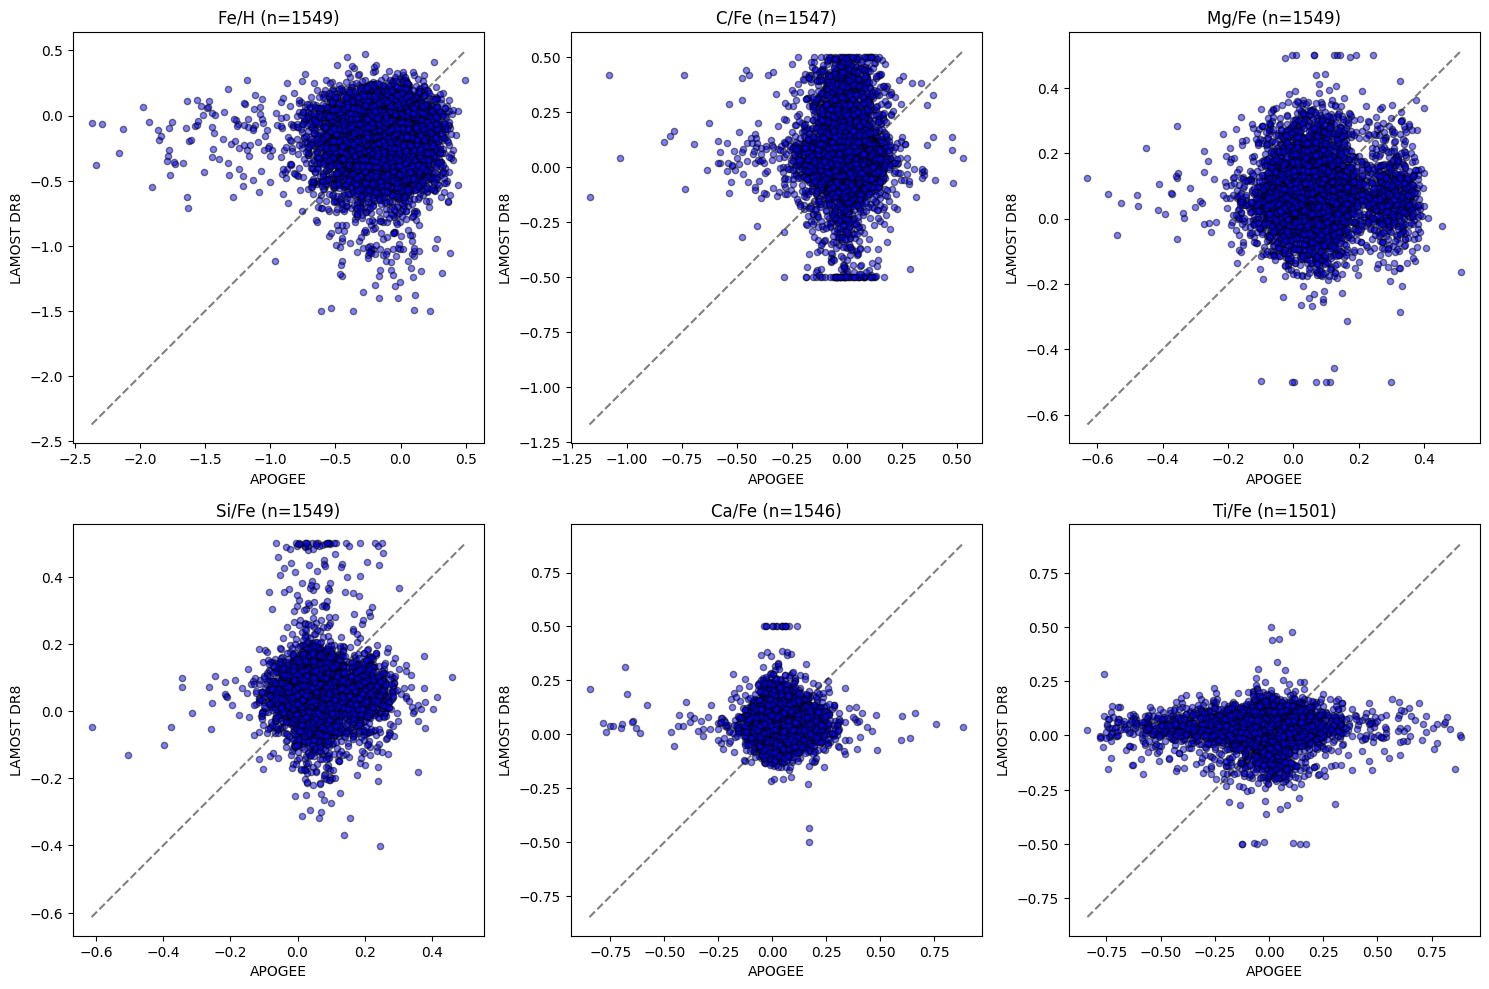

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

axes = axes.flatten()

elements = {
    'Fe/H': ('apogee_fe_h', 'lamost_fe_h', 1549),
    'C/Fe': ('apogee_c_fe', 'lamost_c_fe', 1547),
    'Mg/Fe': ('apogee_mg_fe', 'lamost_mg_fe', 1549),
    'Si/Fe': ('apogee_si_fe', 'lamost_si_fe', 1549),
    'Ca/Fe': ('apogee_ca_fe', 'lamost_ca_fe', 1546),
    'Ti/Fe': ('apogee_ti_fe', 'lamost_ti_fe', 1501)
}

for i, (element, (apogee_col, lamost_col, n_stars)) in enumerate(elements.items()):
    apogee_data = apogee[apogee['GaiaDR3'].isin(common_gaia_ids_apogee_lamost)].copy()[apogee_col]
    lamost_data = lamostafgk[lamostafgk['GaiaDR3'].isin(common_gaia_ids_apogee_lamost)].copy()[lamost_col]
    
    axes[i].scatter(apogee_data, lamost_data, 
                   edgecolor='black',  
                   facecolor='blue',   
                   alpha=0.5,         
                   s=20)              
    
    axes[i].set_xlabel('APOGEE')
    axes[i].set_ylabel('LAMOST DR8')
    axes[i].set_title(f'{element} (n={n_stars})')
    
    min_val = min(apogee_data.min(), lamost_data.min())
    max_val = max(apogee_data.max(), lamost_data.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    axes[i].set_aspect('equal', adjustable='box')
    
    axes[i].grid(False)


plt.tight_layout()

plt.show()

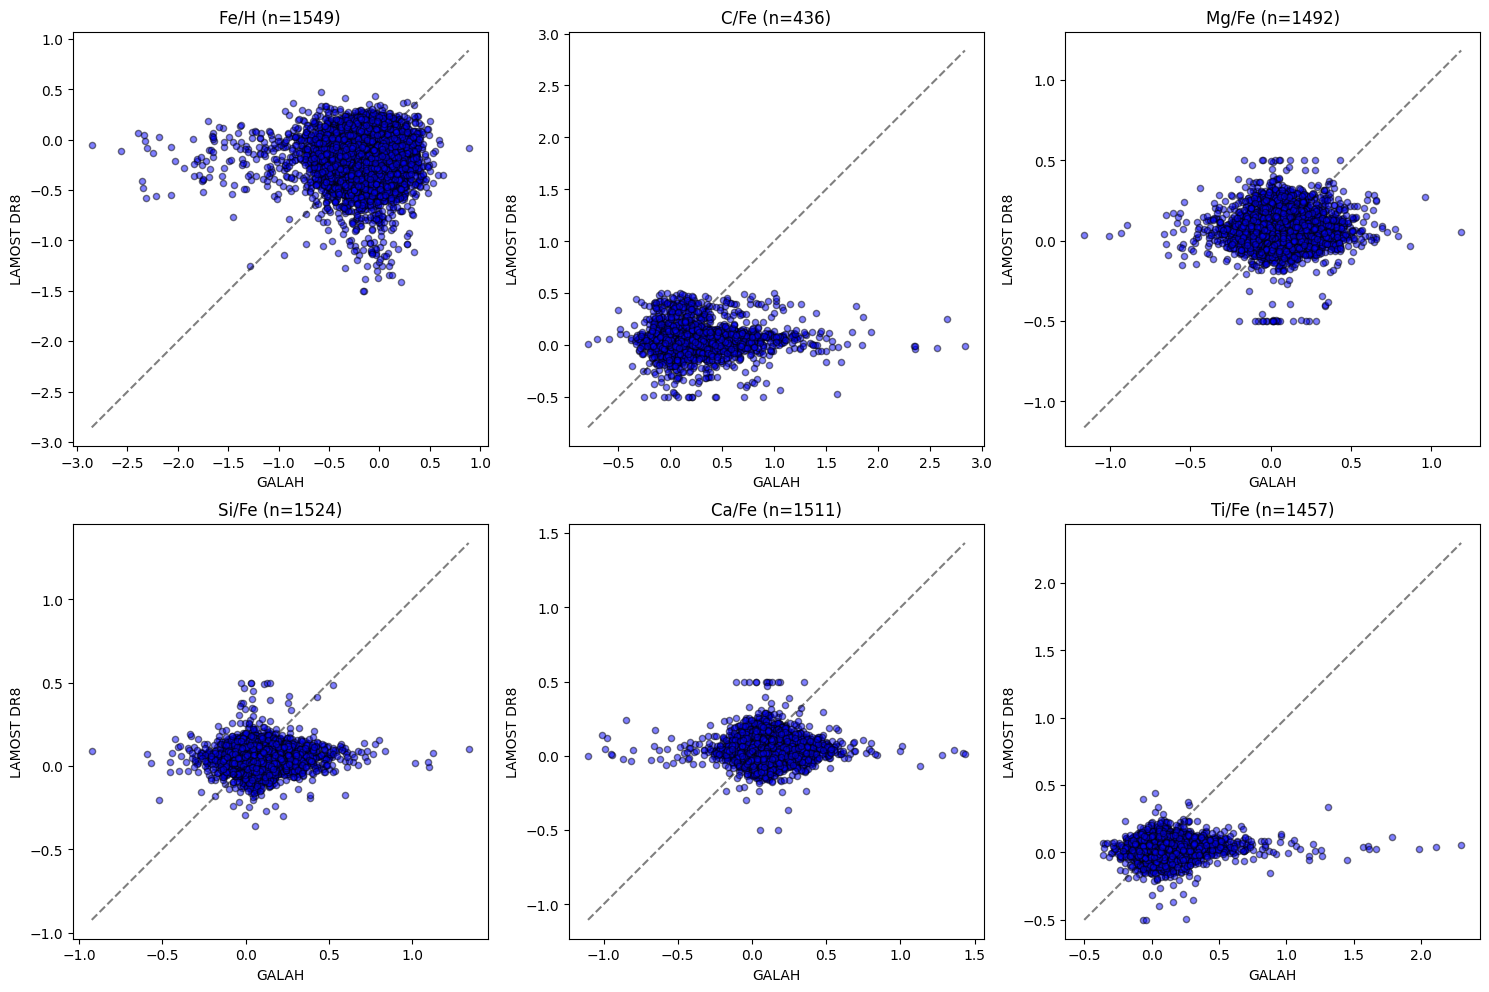

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

axes = axes.flatten()

elements = {
    'Fe/H': ('galah_fe_h', 'lamost_fe_h', 1549),
    'C/Fe': ('galah_c_fe', 'lamost_c_fe', 436),
    'Mg/Fe': ('galah_mg_fe', 'lamost_mg_fe', 1492),
    'Si/Fe': ('galah_si_fe', 'lamost_si_fe', 1524),
    'Ca/Fe': ('galah_ca_fe', 'lamost_ca_fe', 1511),
    'Ti/Fe': ('galah_ti_fe', 'lamost_ti_fe', 1457)
}

for i, (element, (galah_col, lamost_col, n_stars)) in enumerate(elements.items()):
    galah_data = galah[galah['GaiaDR3'].isin(common_gaia_ids_galah_lamost)].copy()[galah_col]
    lamost_data = lamostafgk[lamostafgk['GaiaDR3'].isin(common_gaia_ids_galah_lamost)].copy()[lamost_col]
    
    axes[i].scatter(galah_data, lamost_data, 
                   edgecolor='black',  
                   facecolor='blue',   
                   alpha=0.5,         
                   s=20)             
  
    axes[i].set_xlabel('GALAH')
    axes[i].set_ylabel('LAMOST DR8')
    axes[i].set_title(f'{element} (n={n_stars})')
    
    min_val = min(galah_data.min(), lamost_data.min())
    max_val = max(galah_data.max(), lamost_data.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    axes[i].set_aspect('equal', adjustable='box')

plt.tight_layout()

plt.show()

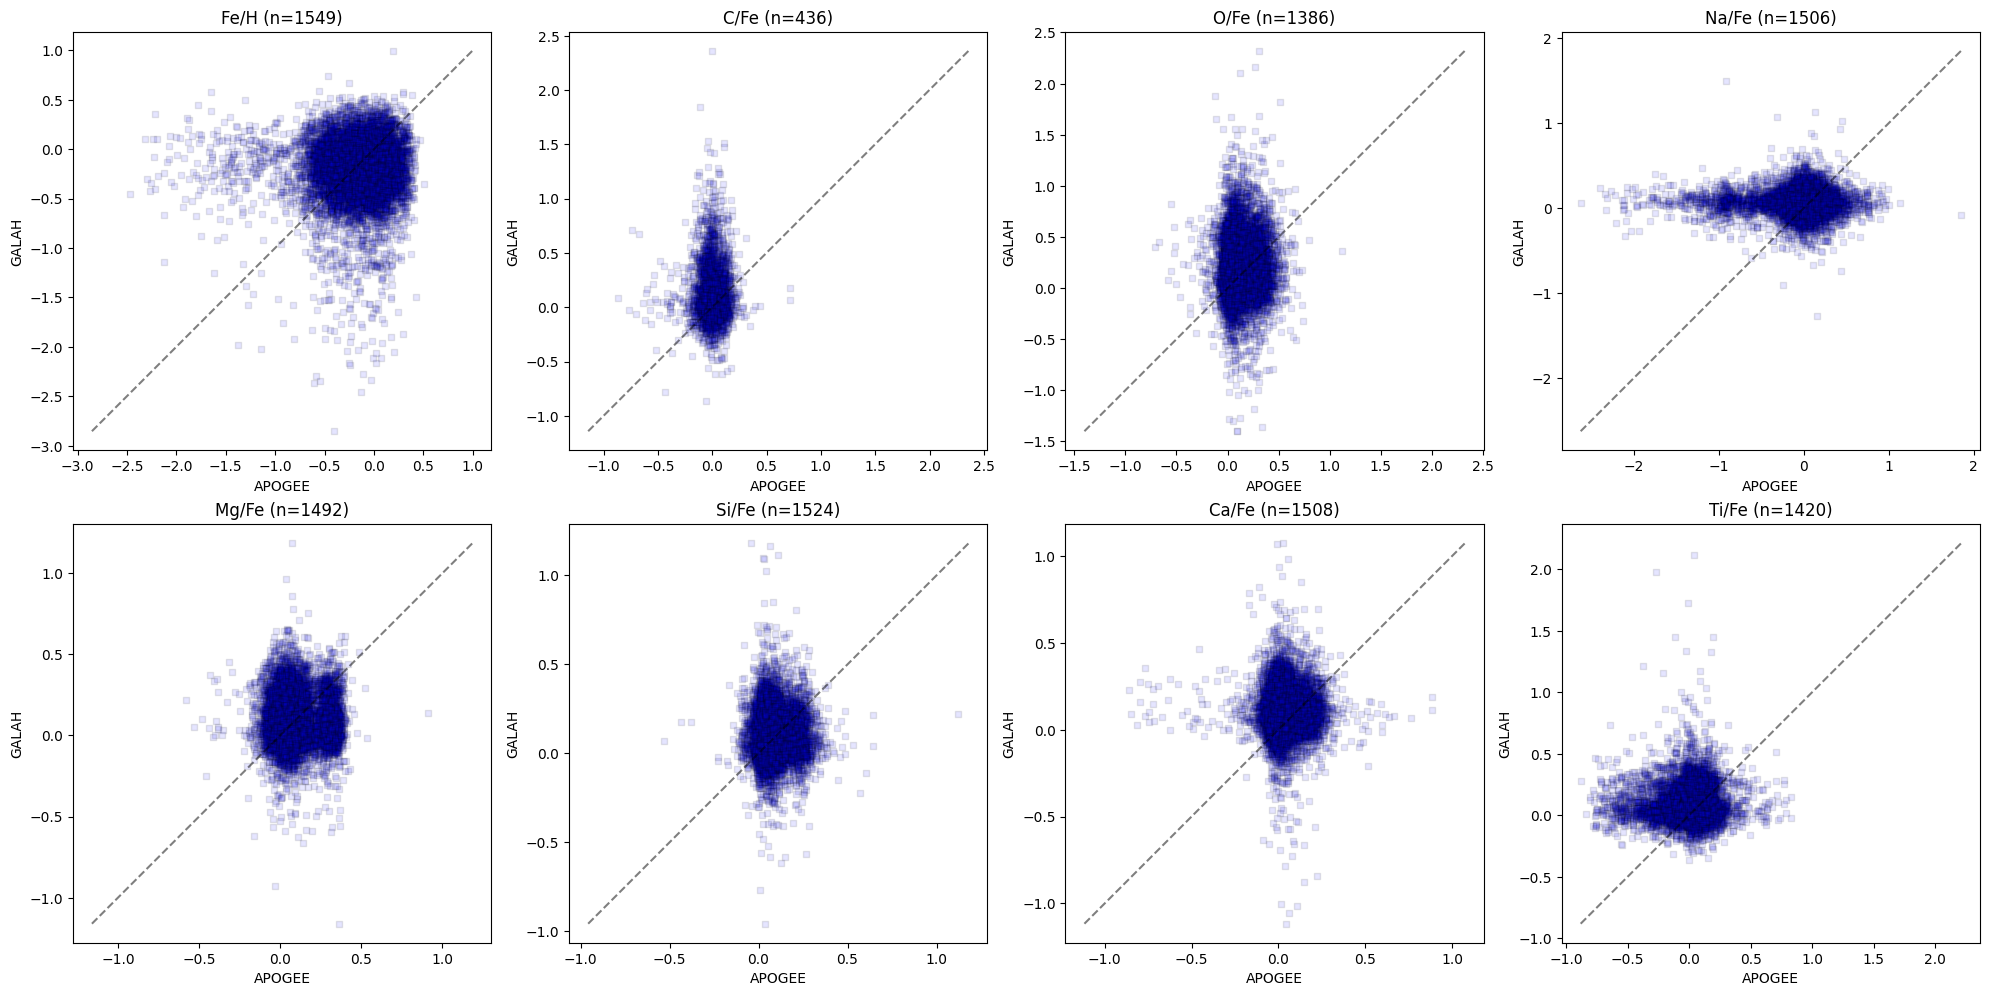

In [71]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

axes = axes.flatten()

elements = {
    'Fe/H': ('apogee_fe_h', 'galah_fe_h', 1549),
    'C/Fe': ('apogee_c_fe', 'galah_c_fe', 436),
    'O/Fe': ('apogee_o_fe', 'galah_o_fe', 1386),
    'Na/Fe': ('apogee_na_fe', 'galah_na_fe', 1506),
    'Mg/Fe': ('apogee_mg_fe', 'galah_mg_fe', 1492),
    'Si/Fe': ('apogee_si_fe', 'galah_si_fe', 1524),
    'Ca/Fe': ('apogee_ca_fe', 'galah_ca_fe', 1508),
    'Ti/Fe': ('apogee_ti_fe', 'galah_ti_fe', 1420)
}

for i, (element, (apogee_col, galah_col, n_stars)) in enumerate(elements.items()):
    apogee_data = apogee[apogee['GaiaDR3'].isin(common_gaia_ids_apogee_galah)].copy()[apogee_col]
    galah_data = galah[galah['GaiaDR3'].isin(common_gaia_ids_apogee_galah)].copy()[galah_col]
    
    axes[i].scatter(apogee_data, galah_data, 
                   edgecolor='black',  
                   facecolor='blue',  
                   alpha=0.1,         
                   s=20,
                   marker=',')              
    
    axes[i].set_xlabel('APOGEE')
    axes[i].set_ylabel('GALAH')
    axes[i].set_title(f'{element} (n={n_stars})')
    
    min_val = min(apogee_data.min(), galah_data.min())
    max_val = max(apogee_data.max(), galah_data.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    axes[i].set_aspect('equal', adjustable='box')

plt.tight_layout()

plt.show()

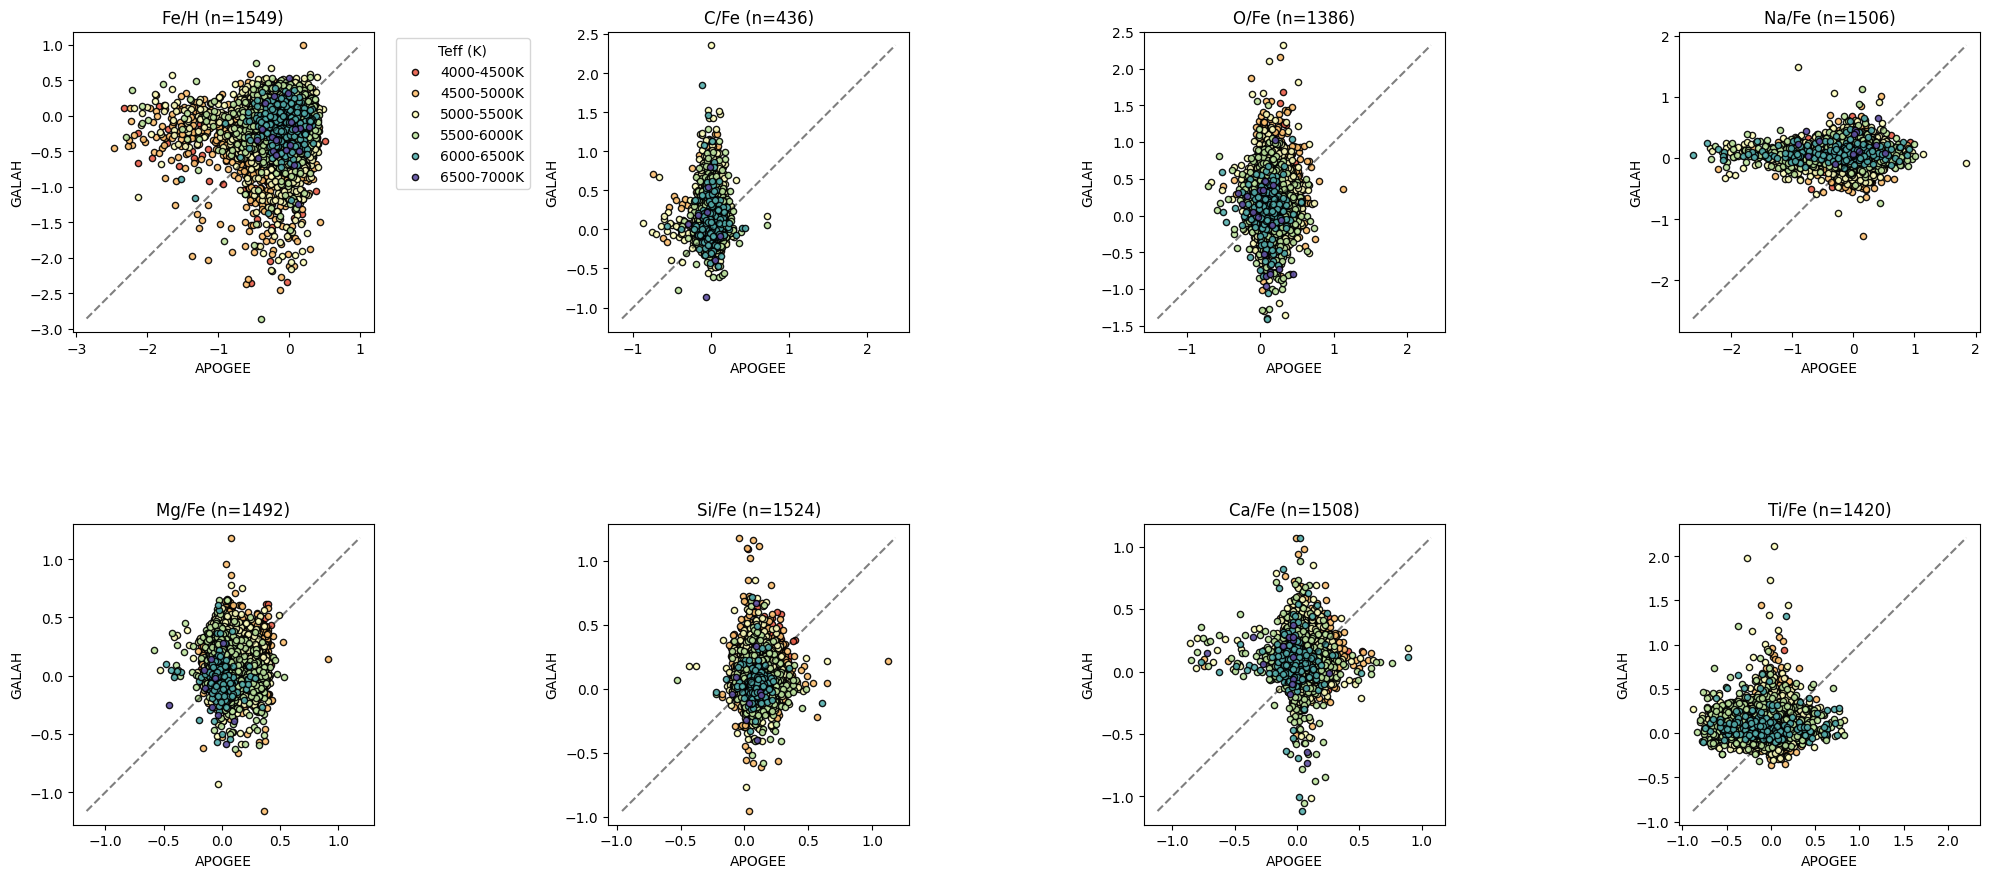

In [72]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

axes = axes.flatten()

elements = {
    'Fe/H': ('apogee_fe_h', 'galah_fe_h', 1549),
    'C/Fe': ('apogee_c_fe', 'galah_c_fe', 436),
    'O/Fe': ('apogee_o_fe', 'galah_o_fe', 1386),
    'Na/Fe': ('apogee_na_fe', 'galah_na_fe', 1506),
    'Mg/Fe': ('apogee_mg_fe', 'galah_mg_fe', 1492),
    'Si/Fe': ('apogee_si_fe', 'galah_si_fe', 1524),
    'Ca/Fe': ('apogee_ca_fe', 'galah_ca_fe', 1508),
    'Ti/Fe': ('apogee_ti_fe', 'galah_ti_fe', 1420)
}

temp_bins = [3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]
temp_colors = plt.cm.Spectral(np.linspace(0, 1, len(temp_bins)-1))

for i, (element, (apogee_col, galah_col, n_stars)) in enumerate(elements.items()):
    mask_common = apogee['GaiaDR3'].isin(common_gaia_ids_apogee_galah)
    
    apogee_data = apogee[mask_common].copy()[apogee_col]
    galah_data = galah[galah['GaiaDR3'].isin(common_gaia_ids_apogee_galah)].copy()[galah_col]
    
    apogee_teff = apogee[mask_common]['apogee_teff']
    galah_teff = galah[galah['GaiaDR3'].isin(common_gaia_ids_apogee_galah)]['galah_teff']
    avg_teff = (apogee_teff.values + galah_teff.values) / 2
    
    for j in range(len(temp_bins)-1):
        mask = (avg_teff >= temp_bins[j]) & (avg_teff < temp_bins[j+1])
        if np.sum(mask) > 0:  
            axes[i].scatter(apogee_data[mask], galah_data[mask],
                          edgecolor='black',
                          facecolor=temp_colors[j],
                          alpha=0.9,
                          s=20,
                          label=f'{temp_bins[j]}-{temp_bins[j+1]}K')
    
    axes[i].set_xlabel('APOGEE')
    axes[i].set_ylabel('GALAH')
    axes[i].set_title(f'{element} (n={n_stars})')
    
    min_val = min(apogee_data.min(), galah_data.min())
    max_val = max(apogee_data.max(), galah_data.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    axes[i].set_aspect('equal', adjustable='box')
    
    if i == 0:
        axes[i].legend(title='Teff (K)', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()

plt.show()

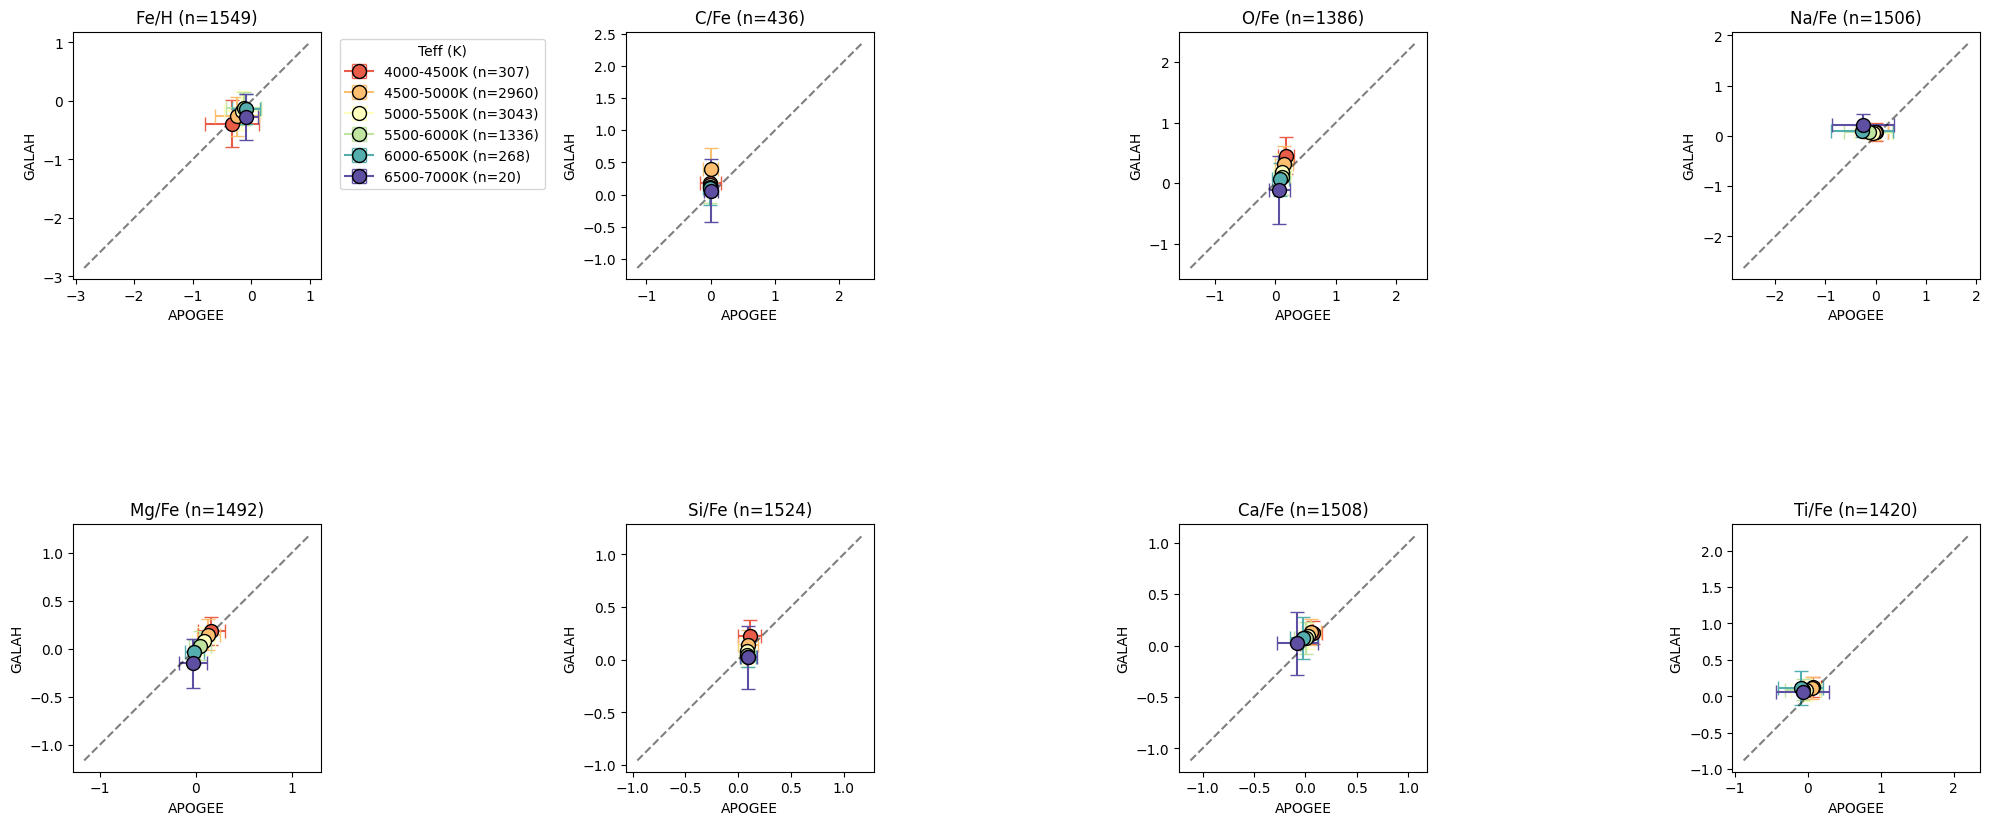

In [73]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

axes = axes.flatten()

elements = {
    'Fe/H': ('apogee_fe_h', 'galah_fe_h', 1549),
    'C/Fe': ('apogee_c_fe', 'galah_c_fe', 436),
    'O/Fe': ('apogee_o_fe', 'galah_o_fe', 1386),
    'Na/Fe': ('apogee_na_fe', 'galah_na_fe', 1506),
    'Mg/Fe': ('apogee_mg_fe', 'galah_mg_fe', 1492),
    'Si/Fe': ('apogee_si_fe', 'galah_si_fe', 1524),
    'Ca/Fe': ('apogee_ca_fe', 'galah_ca_fe', 1508),
    'Ti/Fe': ('apogee_ti_fe', 'galah_ti_fe', 1420)
}

temp_bins = [3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]
temp_colors = plt.cm.Spectral(np.linspace(0, 1, len(temp_bins)-1))

for i, (element, (apogee_col, galah_col, n_stars)) in enumerate(elements.items()):
    mask_common = apogee['GaiaDR3'].isin(common_gaia_ids_apogee_galah)
    
    apogee_data = apogee[mask_common].copy()[apogee_col]
    galah_data = galah[galah['GaiaDR3'].isin(common_gaia_ids_apogee_galah)].copy()[galah_col]
    
    apogee_teff = apogee[mask_common]['apogee_teff']
    galah_teff = galah[galah['GaiaDR3'].isin(common_gaia_ids_apogee_galah)]['galah_teff']
    avg_teff = (apogee_teff.values + galah_teff.values) / 2
    
    for j in range(len(temp_bins)-1):
        mask = (avg_teff >= temp_bins[j]) & (avg_teff < temp_bins[j+1])
        if np.sum(mask) > 0:
            mean_apogee = np.mean(apogee_data[mask])
            mean_galah = np.mean(galah_data[mask])
            std_apogee = np.std(apogee_data[mask])
            std_galah = np.std(galah_data[mask])
            n_stars_bin = np.sum(mask)
            
            axes[i].errorbar(mean_apogee, mean_galah,
                           xerr=std_apogee, yerr=std_galah,
                           color=temp_colors[j],
                           marker='o',
                           markersize=10,
                           markeredgecolor='black',
                           capsize=5,
                           label=f'{temp_bins[j]}-{temp_bins[j+1]}K (n={n_stars_bin})')
    
    axes[i].set_xlabel('APOGEE')
    axes[i].set_ylabel('GALAH')
    axes[i].set_title(f'{element} (n={n_stars})')
    
    all_data = np.concatenate([apogee_data, galah_data])
    min_val = np.nanmin(all_data)
    max_val = np.nanmax(all_data)
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    axes[i].set_aspect('equal', adjustable='box')
    
    if i == 0:
        axes[i].legend(title='Teff (K)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [74]:
np.mean(apogee_k2['apogee_e_na_fe']), np.mean(galah_k2['galah_e_na_fe'])

(0.12322731, 0.07212637646600259)

In [75]:
np.mean(apogee_k2['apogee_e_mg_fe']), np.mean(galah_k2['galah_e_mg_fe'])

(0.014603994, 0.10997377425340553)

In [76]:
np.mean(apogee_k2['apogee_e_si_fe']), np.mean(galah_k2['galah_e_si_fe'])

(0.016350929, 0.07415646151714701)

In [77]:
apogee_k2.columns

Index(['APOGEE_ID', 'apogee_teff', 'apogee_e_teff', 'apogee_logg',
       'apogee_e_logg', 'M_H', 'M_H_ERR', 'apogee_fe_h', 'apogee_e_fe_h',
       'VSINI', 'apogee_c_fe', 'apogee_e_c_fe', 'apogee_o_fe', 'apogee_e_o_fe',
       'apogee_na_fe', 'apogee_e_na_fe', 'apogee_mg_fe', 'apogee_e_mg_fe',
       'apogee_si_fe', 'apogee_e_si_fe', 'apogee_s_fe', 'apogee_e_s_fe',
       'apogee_ca_fe', 'apogee_e_ca_fe', 'apogee_ti_fe', 'apogee_e_ti_fe',
       'GaiaDR3'],
      dtype='object')

In [78]:
lamost_k2.columns[0].split('_')[0]

'LAMOST'

In [82]:
lamostafgk.columns

Index(['LAMOST_ID', 'medID', 'GaiaDR3', 'RA', 'Dec', 'SN_blue', 'SN_red',
       'lamost_teff', 'lamost_logg', 'lamost_fe_h', 'vmic', 'vmac',
       'lamost_c_fe', 'NaFe', 'lamost_mg_fe', 'lamost_si_fe', 'lamost_ca_fe',
       'lamost_ti_fe', 'CrFe', 'MnFe', 'CoFe', 'NiFe', 'CuFe', 'lamost_e_teff',
       'lamost_e_logg', 'lamost_e_fe_h', 'Err_vmic', 'Err_vmac',
       'lamost_e_c_fe', 'Err_NaFe', 'lamost_e_mg_fe', 'lamost_e_si_fe',
       'lamost_e_ca_fe', 'lamost_e_ti_fe', 'Err_CrFe', 'Err_MnFe', 'Err_CoFe',
       'Err_NiFe', 'Err_CuFe', 'Flag_Teff', 'Flag_logg', 'Flag_FeH',
       'Flag_vmic', 'Flag_vmac', 'Flag_CFe', 'Flag_NaFe', 'Flag_MgFe',
       'Flag_SiFe', 'Flag_CaFe', 'Flag_TiFe', 'Flag_CrFe', 'Flag_MnFe',
       'Flag_CoFe', 'Flag_NiFe', 'Flag_CuFe', 'Flag_quality'],
      dtype='object')

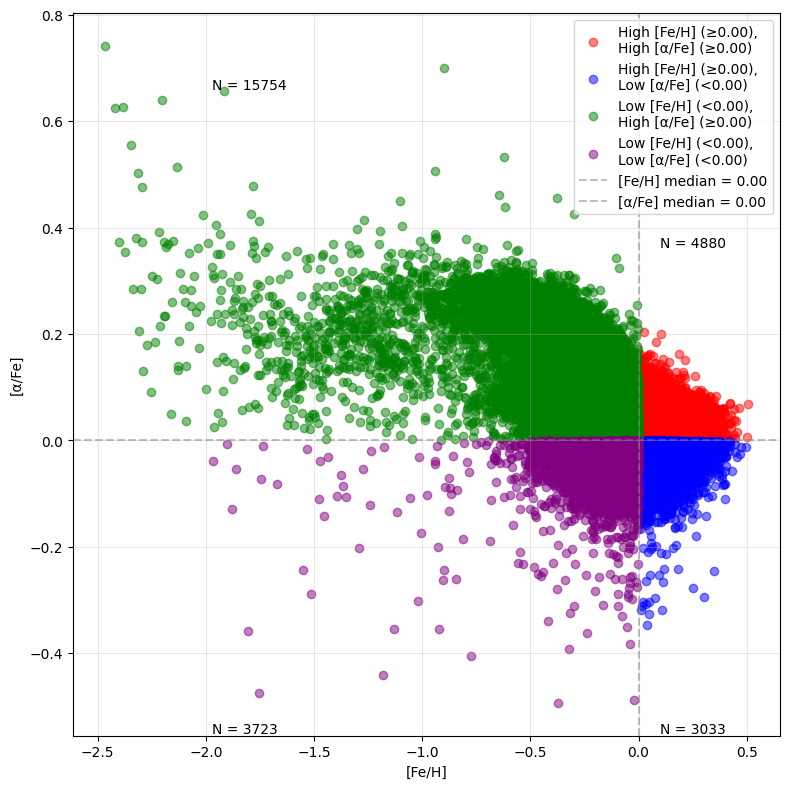

In [83]:
def calculate_mean_alpha(df):
    if "APOGEE" in df.columns[0].split('_')[0]:
        alpha_elements = ['apogee_mg_fe', 'apogee_si_fe', 'apogee_ca_fe', 'apogee_ti_fe','apogee_o_fe']
        return df[alpha_elements].mean(axis=1)
    elif "GALAH" in df.columns[0].split('_')[0]:
        alpha_elements = ['galah_mg_fe', 'galah_si_fe', 'galah_ca_fe', 'galah_ti_fe', 'galah_o_fe']
        return df[alpha_elements].mean(axis=1)
    elif "LAMOST" in df.columns[0].split('_')[0]:
        alpha_elements = ['lamost_mg_fe', 'lamost_si_fe', 'lamost_ca_fe', 'lamost_ti_fe',]
        return df[alpha_elements].mean(axis=1)
    # return df[alpha_elements].mean(axis=1)

def plot_alpha_metallicity(df):
    df['mean_alpha'] = calculate_mean_alpha(df)
    
    fe_h_boundary = 0 #df['apogee_fe_h'].median()
    alpha_boundary = 0 #df['mean_alpha'].median()
    
    plt.figure(figsize=(8, 8))
    
    high_fe_high_alpha = (df['apogee_fe_h'] >= fe_h_boundary) & (df['mean_alpha'] >= alpha_boundary)
    high_fe_low_alpha = (df['apogee_fe_h'] >= fe_h_boundary) & (df['mean_alpha'] < alpha_boundary)
    low_fe_high_alpha = (df['apogee_fe_h'] < fe_h_boundary) & (df['mean_alpha'] >= alpha_boundary)
    low_fe_low_alpha = (df['apogee_fe_h'] < fe_h_boundary) & (df['mean_alpha'] < alpha_boundary)
    
    plt.scatter(df[high_fe_high_alpha]['apogee_fe_h'], 
               df[high_fe_high_alpha]['mean_alpha'], 
               c='red', label=f'High [Fe/H] (≥{fe_h_boundary:.2f}),\nHigh [α/Fe] (≥{alpha_boundary:.2f})', alpha=0.5)
    plt.scatter(df[high_fe_low_alpha]['apogee_fe_h'], 
               df[high_fe_low_alpha]['mean_alpha'], 
               c='blue', label=f'High [Fe/H] (≥{fe_h_boundary:.2f}),\nLow [α/Fe] (<{alpha_boundary:.2f})', alpha=0.5)
    plt.scatter(df[low_fe_high_alpha]['apogee_fe_h'], 
               df[low_fe_high_alpha]['mean_alpha'], 
               c='green', label=f'Low [Fe/H] (<{fe_h_boundary:.2f}),\nHigh [α/Fe] (≥{alpha_boundary:.2f})', alpha=0.5)
    plt.scatter(df[low_fe_low_alpha]['apogee_fe_h'], 
               df[low_fe_low_alpha]['mean_alpha'], 
               c='purple', label=f'Low [Fe/H] (<{fe_h_boundary:.2f}),\nLow [α/Fe] (<{alpha_boundary:.2f})', alpha=0.5)
    
    plt.axvline(x=fe_h_boundary, color='gray', linestyle='--', alpha=0.5, 
               label=f'[Fe/H] median = {fe_h_boundary:.2f}')
    plt.axhline(y=alpha_boundary, color='gray', linestyle='--', alpha=0.5,
               label=f'[α/Fe] median = {alpha_boundary:.2f}')
    
    plt.xlabel('[Fe/H]')
    plt.ylabel('[α/Fe]')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    n_high_fe_high_alpha = sum(high_fe_high_alpha)
    n_high_fe_low_alpha = sum(high_fe_low_alpha)
    n_low_fe_high_alpha = sum(low_fe_high_alpha)
    n_low_fe_low_alpha = sum(low_fe_low_alpha)
    
    plt.text(df['apogee_fe_h'].min() * 0.8, df['mean_alpha'].max() * 0.9, 
             f'N = {n_low_fe_high_alpha}', ha='left', va='center')
    plt.text(df['apogee_fe_h'].max() * 0.8, df['mean_alpha'].max() * 0.5, 
             f'N = {n_high_fe_high_alpha}', ha='right', va='center')
    plt.text(df['apogee_fe_h'].min() * 0.8, df['mean_alpha'].min() * 1.1, 
             f'N = {n_low_fe_low_alpha}', ha='left', va='center')
    plt.text(df['apogee_fe_h'].max() * 0.8, df['mean_alpha'].min() * 1.1, 
             f'N = {n_high_fe_low_alpha}', ha='right', va='center')
    
    plt.tight_layout()
    return plt

plot_alpha_metallicity(apogee_k2)
plt.show()

In [84]:
planets_df = pd.read_csv("planet_sample.csv")

In [85]:
planets_df.columns

Index(['EPIC', 'CAND', 'CAMP', 't0', 'u_t0', 'U_t0', 'Ratio', 'u_Ratio',
       'U_Ratio', 'b', 'u_b', 'U_b', 'Period', 'u_Period', 'U_period', 'Rad',
       'u_Rad', 'U_Rad', 'MajAxis', 'u_MajAxis', 'U_MajAxis', 'tdur', 'Teff',
       'u_Teff', 'logg', 'u_logg', 'FeH', 'u_FeH', 'SpT', 'R*', 'U_R*', 'u_R*',
       'M*', 'U_M*', 'u_M*', 'Score', 'MULT', 'Flag'],
      dtype='object')

In [86]:
planets_df.rename(columns={'EPIC':'EPIC_ID'}, inplace=True)

In [87]:
planets_df

,EPIC_ID,CAND,CAMP,t0,u_t0,U_t0,Ratio,u_Ratio,U_Ratio,b,u_b,U_b,Period,u_Period,U_period,Rad,u_Rad,U_Rad,MajAxis,u_MajAxis,U_MajAxis,tdur,Teff,u_Teff,logg,u_logg,FeH,u_FeH,SpT,R*,U_R*,u_R*,M*,U_M*,u_M*,Score,MULT,Flag
0,201155177,2.011552e+08,1,1981.672527,0.005207,0.005952,0.028500,0.001077,0.001181,0.201207,0.140025,0.185655,6.689040,0.000871,0.000796,2.309274,0.183863,0.201569,15.997296,1.052599,1.034527,0.134334,4443,138,4.624,0.150,-0.116,0.235,K5,0.742,0.057,0.052,0.844,0.383,0.262,0.872727,0,KP
1,201173390,2.011734e+08,1,1983.427095,0.000633,0.000625,0.182038,0.000976,0.000853,0.432621,0.028255,0.022846,16.996490,0.000247,0.000230,51.127650,3.588634,4.022614,11.431650,0.134225,0.156968,0.521405,4793,138,3.725,0.150,0.173,0.235,G5,2.572,0.202,0.180,1.279,0.575,0.400,0.886792,0,FP
2,201208431,2.012084e+08,1,1982.519235,0.005287,0.004305,0.035214,0.000918,0.001187,0.299848,0.199897,0.211562,10.004208,0.000858,0.000881,2.541798,0.185302,0.214005,24.716307,2.151054,1.559470,0.127693,4050,138,4.583,0.150,-0.208,0.235,K7,0.661,0.051,0.045,0.610,0.279,0.188,0.900000,0,KP
3,201247497,2.012475e+08,1,1977.901461,0.002110,0.002438,0.091706,0.018530,0.027966,0.910113,0.382036,0.057708,2.754012,0.000132,0.000122,7.480716,1.615751,2.361596,9.550790,1.169349,7.543085,0.055377,3699,138,4.780,0.508,-0.288,0.235,M0,0.747,0.061,0.057,0.470,1.569,1.471,0.960000,0,PC
4,201295312,2.012953e+08,1,1978.716633,0.002366,0.003646,0.017098,0.000349,0.000378,0.371234,0.224230,0.171509,5.656766,0.000323,0.000276,2.923811,0.174828,0.197591,9.518354,0.892962,0.608400,0.179429,5937,138,4.132,0.150,-0.391,0.235,G0,1.566,0.100,0.088,1.201,0.540,0.363,0.942308,0,KP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,212110888,2.121109e+08,18,3419.732143,0.000090,0.000089,0.090632,0.000147,0.000146,0.867069,0.001316,0.001340,2.995625,0.000010,0.000010,13.885577,0.287896,0.287891,5.905929,0.024356,0.024046,0.107037,6139,16,4.226,0.025,0.023,0.013,F9,1.403,0.029,0.029,1.210,0.090,0.082,0.940000,1,KP
802,212154564,2.121546e+08,18,3418.743347,0.001356,0.001857,0.065904,0.002119,0.001835,0.526627,0.062985,0.047182,6.414870,0.000407,0.000293,2.965059,0.128651,0.124783,26.165657,0.850616,0.801111,0.072335,3623,138,4.815,0.030,0.118,0.235,M3,0.412,0.013,0.012,0.403,0.015,0.014,0.920000,1,KP
803,212161956,2.121620e+08,18,3421.715665,0.004926,0.007899,0.034689,0.001693,0.001807,0.300393,0.200932,0.221268,7.189537,0.002156,0.001458,2.333444,0.195648,0.209373,22.529154,2.108614,2.010666,0.100609,4307,138,4.735,0.150,-0.429,0.235,K5,0.616,0.045,0.042,0.749,0.340,0.232,0.921569,0,KP
804,212164470,2.121645e+08,18,3420.763318,0.002046,0.002396,0.020834,0.000700,0.000703,0.628845,0.069442,0.056253,7.809541,0.000578,0.000781,2.698188,0.116259,0.117976,13.944674,0.769596,0.808686,0.143432,5907,42,4.269,0.070,-0.063,0.041,G2,1.186,0.033,0.032,0.954,0.176,0.149,0.716981,1,KP


In [88]:
apogee_k2

,APOGEE_ID,apogee_teff,apogee_e_teff,apogee_logg,apogee_e_logg,M_H,M_H_ERR,apogee_fe_h,apogee_e_fe_h,VSINI,apogee_c_fe,apogee_e_c_fe,apogee_o_fe,apogee_e_o_fe,apogee_na_fe,apogee_e_na_fe,apogee_mg_fe,apogee_e_mg_fe,apogee_si_fe,apogee_e_si_fe,apogee_s_fe,apogee_e_s_fe,apogee_ca_fe,apogee_e_ca_fe,apogee_ti_fe,apogee_e_ti_fe,GaiaDR3,mean_alpha
20,2M08512734+1207406,6414.950684,50.177200,3.630539,0.026316,-0.195930,0.007919,-0.171520,0.005735,83.157219,0.245080,0.073048,0.096533,0.180384,-0.315096,0.245252,0.079477,0.013985,0.140733,0.014844,0.309632,0.046453,-0.107256,0.015152,0.075839,0.124620,604997202213330560,0.057065
33,2M08493387+1210146,6141.840332,33.848484,4.332716,0.019407,0.114710,0.004163,0.113590,0.004491,6.692062,-0.058748,0.040077,0.026001,0.090233,-0.119295,0.129005,-0.084621,0.010801,0.059572,0.011563,-0.039329,0.037375,-0.044192,0.010164,-0.336101,0.076639,604992258706635520,-0.075868
78,2M11472567+0200479,6161.712891,42.310013,3.953924,0.026457,-0.244870,0.005798,-0.243420,0.006289,12.325373,0.064212,0.060209,0.130493,0.126443,-0.583866,0.221409,-0.024453,0.013057,0.114781,0.013706,0.066846,0.048409,-0.030559,0.014227,-0.451271,0.103289,3796497931407541760,-0.052202
156,2M08500587+1157508,4621.874023,7.503578,2.572724,0.023368,-0.206390,0.006524,-0.209610,0.007735,NaN,0.048234,0.012192,0.150883,0.014400,-0.003968,0.056977,0.151365,0.011393,0.094127,0.013324,0.127792,0.036156,0.057566,0.013619,0.077967,0.018890,604968413048207488,0.106382
176,2M09153632+2212581,4506.389648,7.480146,1.938694,0.026604,-0.507350,0.007493,-0.508460,0.008656,NaN,-0.100110,0.014483,0.138251,0.015246,0.006922,0.071307,0.118522,0.013380,0.074114,0.015035,0.152452,0.046635,0.003696,0.016486,-0.018075,0.020827,638732113034343936,0.063302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422430,2M08361931+1958123,4001.658203,10.919271,4.646050,0.027633,-0.271550,0.012885,-0.251880,0.013728,2.528774,-0.115849,0.017577,-0.031429,0.015193,NaN,NaN,-0.061011,0.020396,-0.055977,0.020343,NaN,NaN,-0.064004,0.020503,-0.152432,0.026903,664355063290164864,-0.072971
422431,2M13382461-1602574,5097.162109,17.654261,3.994737,0.035922,-0.405350,0.009894,-0.403220,0.011118,1.501966,0.105000,0.031037,0.316953,0.047246,-0.060258,0.147485,0.345033,0.019122,0.217691,0.024084,0.275272,0.072327,0.199595,0.026956,0.203103,0.041752,3605421708356125824,0.256475
422436,2M22244905-0452029,5594.962402,33.590431,4.466763,0.031180,-0.154810,0.008594,-0.149110,0.009360,1.507093,-0.007438,0.046540,0.113553,0.079127,-0.138206,0.190187,0.081024,0.017881,0.100268,0.019991,0.054446,0.071452,-0.015463,0.020141,-0.523781,0.083743,2626391609814301696,-0.048880
422447,2M04040686+1552067,4768.180176,16.142450,4.588068,0.024506,-0.023241,0.008853,-0.020188,0.009497,1.755497,-0.134823,0.019735,0.007725,0.020922,-0.213918,0.087934,-0.026757,0.016831,0.020099,0.017720,0.083710,0.067192,-0.013071,0.016519,-0.127725,0.036703,45428835460364928,-0.027946


In [89]:
apogee_k2.columns

Index(['APOGEE_ID', 'apogee_teff', 'apogee_e_teff', 'apogee_logg',
       'apogee_e_logg', 'M_H', 'M_H_ERR', 'apogee_fe_h', 'apogee_e_fe_h',
       'VSINI', 'apogee_c_fe', 'apogee_e_c_fe', 'apogee_o_fe', 'apogee_e_o_fe',
       'apogee_na_fe', 'apogee_e_na_fe', 'apogee_mg_fe', 'apogee_e_mg_fe',
       'apogee_si_fe', 'apogee_e_si_fe', 'apogee_s_fe', 'apogee_e_s_fe',
       'apogee_ca_fe', 'apogee_e_ca_fe', 'apogee_ti_fe', 'apogee_e_ti_fe',
       'GaiaDR3', 'mean_alpha'],
      dtype='object')

In [90]:
k2_updated

,EPIC_ID,Campaign,CDPP1,CDPP1_5,CDPP2,CDPP2_5,CDPP3,CDPP4,CDPP5,CDPP6,CDPP7,CDPP8,CDPP9,CDPP10,SpT,RUWE,Ncomp,Rad,U_Rad,u_Rad,Teff,U_Teff,logg,U_logg,Mass,U_Mass,FeH,U_FeH,limb1,limb2,d_mag,GaiaDR3
0,201121245,1,257.151,236.598,226.563,209.841,191.452,174.727,171.493,155.131,149.860,144.238,141.405,133.911,G5,1.174929,0.0,4.415,0.348,0.329,4814,138,3.283,0.150,1.373,0.610,-0.100,0.235,0.6212,0.1129,0.0,3598701493287932544
1,201122521,1,486.386,450.572,368.257,355.254,328.753,295.503,264.617,253.877,242.677,221.716,213.211,211.158,G8,0.947940,0.0,2.522,0.287,0.247,5144,138,3.652,0.150,1.052,0.511,-0.375,0.235,0.4664,0.2249,0.0,3598719154193454976
2,201123619,1,639.118,587.075,533.719,479.562,471.031,425.428,373.952,361.346,343.016,318.207,315.377,314.689,M1,1.127277,0.0,0.528,0.017,0.017,3676,138,4.713,0.043,0.525,0.042,-0.038,0.235,0.4651,0.2700,0.0,3598719497790839040
3,201124275,1,318.189,290.435,247.494,226.639,216.320,191.155,194.745,172.046,163.704,162.496,153.891,145.076,F2,1.045741,0.0,0.702,0.023,0.022,5803,54,3.938,0.089,0.156,0.036,-1.904,0.052,0.3303,0.2676,0.0,3598743206010226560
4,201126062,1,508.280,490.850,461.111,464.825,448.749,427.476,411.245,430.483,406.875,420.975,406.456,425.315,M1,1.633868,0.0,0.609,0.020,0.021,3722,138,4.637,0.065,0.587,0.084,0.050,0.235,0.4996,0.2285,0.0,3598723620959410816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206121,211724246,18,125.393,117.550,112.410,97.499,92.925,74.035,70.131,70.311,67.410,62.124,61.031,61.397,K1,0.978792,0.0,2.207,0.153,0.146,5878,138,3.977,0.151,1.677,0.759,0.016,0.198,0.4695,0.2240,0.0,658130865403183872
206122,211730267,18,208.273,206.536,177.306,175.085,170.118,140.380,153.043,160.229,139.191,150.403,131.543,137.804,K4,0.966075,0.0,0.995,0.068,0.062,5383,138,4.490,0.151,1.110,0.499,0.213,0.198,0.6767,0.0697,0.0,610181468257262464
206123,211830266,18,846.281,825.627,736.583,626.123,610.549,520.170,467.402,431.880,402.149,381.403,367.534,354.297,M3,0.977467,0.0,1.598,0.129,0.115,4578,141,3.577,0.154,0.352,0.168,-0.214,0.250,0.3284,0.3566,0.0,657247717049167488
206124,211914998,18,100.992,92.874,93.439,93.967,98.588,108.393,109.383,113.219,110.807,112.347,116.787,114.714,G4,0.976495,0.0,0.898,0.059,0.053,5539,138,4.420,0.151,0.779,0.352,-0.141,0.198,0.4415,0.2396,0.0,660400738439361280


In [91]:
apogee_k2 = apogee_k2.merge(k2_updated[['GaiaDR3', 'EPIC_ID']], on='GaiaDR3', how='left')

In [92]:
galah_k2 = galah_k2.merge(k2_updated[['GaiaDR3', 'EPIC_ID']], on='GaiaDR3', how='left')

In [93]:
lamost_k2 = lamost_k2.merge(k2_updated[['GaiaDR3', 'EPIC_ID']], on='GaiaDR3', how='left')

In [94]:
planet_epics = set(planets_df['EPIC_ID'].unique())

apogee_k2['Planet_flag'] = apogee_k2['EPIC_ID'].apply(lambda x: 1 if x in planet_epics else 0)

total_stars = len(apogee_k2)
stars_with_planets = apogee_k2['Planet_flag'].sum()

print(f"Total stars in dataset: {total_stars}")
print(f"Stars with planets: {stars_with_planets}")
print(f"Planet occurrence rate: {(stars_with_planets/total_stars*100):.1f}%")

Total stars in dataset: 27390
Stars with planets: 92
Planet occurrence rate: 0.3%


In [95]:
planet_epics = set(planets_df['EPIC_ID'].unique())

galah_k2['Planet_flag'] = galah_k2['EPIC_ID'].apply(lambda x: 1 if x in planet_epics else 0)

total_stars = len(galah_k2)
stars_with_planets = galah_k2['Planet_flag'].sum()

print(f"Total stars in dataset: {total_stars}")
print(f"Stars with planets: {stars_with_planets}")
print(f"Planet occurrence rate: {(stars_with_planets/total_stars*100):.1f}%")

Total stars in dataset: 33273
Stars with planets: 102
Planet occurrence rate: 0.3%


In [96]:
planet_epics = set(planets_df['EPIC_ID'].unique())

lamost_k2['Planet_flag'] = lamost_k2['EPIC_ID'].apply(lambda x: 1 if x in planet_epics else 0)

total_stars = len(lamost_k2)
stars_with_planets = lamost_k2['Planet_flag'].sum()

print(f"Total stars in dataset: {total_stars}")
print(f"Stars with planets: {stars_with_planets}")
print(f"Planet occurrence rate: {(stars_with_planets/total_stars*100):.1f}%")

Total stars in dataset: 27017
Stars with planets: 86
Planet occurrence rate: 0.3%


In [97]:
planets_df

,EPIC_ID,CAND,CAMP,t0,u_t0,U_t0,Ratio,u_Ratio,U_Ratio,b,u_b,U_b,Period,u_Period,U_period,Rad,u_Rad,U_Rad,MajAxis,u_MajAxis,U_MajAxis,tdur,Teff,u_Teff,logg,u_logg,FeH,u_FeH,SpT,R*,U_R*,u_R*,M*,U_M*,u_M*,Score,MULT,Flag
0,201155177,2.011552e+08,1,1981.672527,0.005207,0.005952,0.028500,0.001077,0.001181,0.201207,0.140025,0.185655,6.689040,0.000871,0.000796,2.309274,0.183863,0.201569,15.997296,1.052599,1.034527,0.134334,4443,138,4.624,0.150,-0.116,0.235,K5,0.742,0.057,0.052,0.844,0.383,0.262,0.872727,0,KP
1,201173390,2.011734e+08,1,1983.427095,0.000633,0.000625,0.182038,0.000976,0.000853,0.432621,0.028255,0.022846,16.996490,0.000247,0.000230,51.127650,3.588634,4.022614,11.431650,0.134225,0.156968,0.521405,4793,138,3.725,0.150,0.173,0.235,G5,2.572,0.202,0.180,1.279,0.575,0.400,0.886792,0,FP
2,201208431,2.012084e+08,1,1982.519235,0.005287,0.004305,0.035214,0.000918,0.001187,0.299848,0.199897,0.211562,10.004208,0.000858,0.000881,2.541798,0.185302,0.214005,24.716307,2.151054,1.559470,0.127693,4050,138,4.583,0.150,-0.208,0.235,K7,0.661,0.051,0.045,0.610,0.279,0.188,0.900000,0,KP
3,201247497,2.012475e+08,1,1977.901461,0.002110,0.002438,0.091706,0.018530,0.027966,0.910113,0.382036,0.057708,2.754012,0.000132,0.000122,7.480716,1.615751,2.361596,9.550790,1.169349,7.543085,0.055377,3699,138,4.780,0.508,-0.288,0.235,M0,0.747,0.061,0.057,0.470,1.569,1.471,0.960000,0,PC
4,201295312,2.012953e+08,1,1978.716633,0.002366,0.003646,0.017098,0.000349,0.000378,0.371234,0.224230,0.171509,5.656766,0.000323,0.000276,2.923811,0.174828,0.197591,9.518354,0.892962,0.608400,0.179429,5937,138,4.132,0.150,-0.391,0.235,G0,1.566,0.100,0.088,1.201,0.540,0.363,0.942308,0,KP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,212110888,2.121109e+08,18,3419.732143,0.000090,0.000089,0.090632,0.000147,0.000146,0.867069,0.001316,0.001340,2.995625,0.000010,0.000010,13.885577,0.287896,0.287891,5.905929,0.024356,0.024046,0.107037,6139,16,4.226,0.025,0.023,0.013,F9,1.403,0.029,0.029,1.210,0.090,0.082,0.940000,1,KP
802,212154564,2.121546e+08,18,3418.743347,0.001356,0.001857,0.065904,0.002119,0.001835,0.526627,0.062985,0.047182,6.414870,0.000407,0.000293,2.965059,0.128651,0.124783,26.165657,0.850616,0.801111,0.072335,3623,138,4.815,0.030,0.118,0.235,M3,0.412,0.013,0.012,0.403,0.015,0.014,0.920000,1,KP
803,212161956,2.121620e+08,18,3421.715665,0.004926,0.007899,0.034689,0.001693,0.001807,0.300393,0.200932,0.221268,7.189537,0.002156,0.001458,2.333444,0.195648,0.209373,22.529154,2.108614,2.010666,0.100609,4307,138,4.735,0.150,-0.429,0.235,K5,0.616,0.045,0.042,0.749,0.340,0.232,0.921569,0,KP
804,212164470,2.121645e+08,18,3420.763318,0.002046,0.002396,0.020834,0.000700,0.000703,0.628845,0.069442,0.056253,7.809541,0.000578,0.000781,2.698188,0.116259,0.117976,13.944674,0.769596,0.808686,0.143432,5907,42,4.269,0.070,-0.063,0.041,G2,1.186,0.033,0.032,0.954,0.176,0.149,0.716981,1,KP


In [98]:
galah_k2

,GALAH_ID,GaiaDR2,GaiaDR3,galah_teff,galah_e_teff,galah_logg,galah_e_logg,galah_fe_h,galah_e_fe_h,galah_alpha_fe,galah_e_alpha_fe,galah_li_fe,galah_e_li_fe,galah_c_fe,galah_e_c_fe,galah_o_fe,galah_e_o_fe,galah_na_fe,galah_e_na_fe,galah_mg_fe,galah_e_mg_fe,galah_si_fe,galah_e_si_fe,galah_ca_fe,galah_e_ca_fe,galah_ti_fe,galah_e_ti_fe,EPIC_ID,Planet_flag
0,08510951+1141449,604910001493155584,604910001493155584,5506.381348,72.032535,3.730051,0.189936,0.040548,0.044856,0.017093,0.013580,NaN,NaN,0.025787,0.050726,-0.011449,0.061494,0.001484,0.023950,0.021449,0.032922,0.032894,0.028007,0.016833,0.033151,-0.005576,0.027932,211403555,0
1,08510325+1145473,604914468259140224,604914468259140224,5872.297363,71.362505,3.859879,0.188337,0.005011,0.045019,-0.039901,0.016953,NaN,NaN,0.029355,0.046782,0.083305,0.059684,0.060829,0.023667,-0.074385,0.032705,-0.038326,0.027617,0.119570,0.032152,-0.000646,0.024994,211408015,0
2,08510839+1147121,604914601402325504,604914601402325504,4948.272461,71.608518,3.285715,0.190714,-0.002527,0.042889,0.017223,0.012654,NaN,NaN,NaN,NaN,0.211810,0.056508,0.027950,0.023281,-0.008934,0.032448,0.024017,0.027046,0.055564,0.030442,-0.004946,0.017525,211409560,0
3,08511854+1149214,604920648716270848,604920648716270848,5877.299316,71.863887,3.847467,0.187420,-0.021642,0.045938,-0.042297,0.018328,NaN,NaN,0.083005,0.053239,-0.125735,0.062753,0.049920,0.024171,-0.049147,0.033102,-0.039594,0.028301,0.116885,0.033852,0.007082,0.025304,211412077,0
4,08505182+1156559,604969783142095744,604969783142095744,6021.339844,73.218520,3.763182,0.189396,-0.097961,0.049370,-0.025351,0.017125,NaN,NaN,0.083348,0.067561,0.033572,0.071412,0.110805,0.026120,0.025303,0.034952,-0.004332,0.030723,0.030084,0.038787,-0.141356,0.033961,211420549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33268,12502079-0739246,3675610441864576768,3675610441864576768,5783.492676,117.719167,4.019611,0.208386,-0.200357,0.132926,0.057434,0.073661,1.109209,0.129550,0.339236,0.182048,0.286304,0.216088,-0.177734,0.116900,0.028068,0.195762,-0.067883,0.114679,0.195113,0.129074,0.149159,0.212507,228779165,0
33269,12500613-0740597,3675587077242444928,3675587077242444928,4627.651855,154.155152,1.948199,0.352384,-0.824254,0.148277,0.071595,0.075864,0.443663,0.136097,NaN,NaN,0.269108,0.231064,-0.391886,0.130658,-0.026268,0.225079,-0.039238,0.126209,0.228786,0.138789,0.090145,0.159481,228778547,0
33270,12495492-0743364,3675586493126929536,3675586493126929536,4710.108887,167.771094,4.585253,0.216205,-0.302667,0.160795,0.176420,0.093242,0.173970,0.144173,NaN,NaN,1.011546,0.250145,-0.156902,0.149135,NaN,NaN,0.195297,0.141468,0.109186,0.151227,0.270039,0.216537,228777558,0
33271,12502580-0744381,3675583435110216192,3675583435110216192,5600.641602,124.942581,4.560338,0.193317,-0.179912,0.123746,-0.078797,0.071188,1.118363,0.129319,0.698685,0.181756,0.014062,0.215568,-0.176045,0.116434,-0.233434,0.194783,-0.064542,0.114285,-0.031214,0.128738,-0.147491,0.209936,228777175,0


In [99]:
lamost_k2

,LAMOST_ID,medID,GaiaDR3,RA,Dec,SN_blue,SN_red,lamost_teff,lamost_logg,lamost_fe_h,vmic,vmac,lamost_c_fe,NaFe,lamost_mg_fe,lamost_si_fe,lamost_ca_fe,lamost_ti_fe,CrFe,MnFe,CoFe,NiFe,CuFe,lamost_e_teff,lamost_e_logg,lamost_e_fe_h,Err_vmic,Err_vmac,lamost_e_c_fe,Err_NaFe,lamost_e_mg_fe,lamost_e_si_fe,lamost_e_ca_fe,lamost_e_ti_fe,Err_CrFe,Err_MnFe,Err_CoFe,Err_NiFe,Err_CuFe,Flag_Teff,Flag_logg,Flag_FeH,Flag_vmic,Flag_vmac,Flag_CFe,Flag_NaFe,Flag_MgFe,Flag_SiFe,Flag_CaFe,Flag_TiFe,Flag_CrFe,Flag_MnFe,Flag_CoFe,Flag_NiFe,Flag_CuFe,Flag_quality,EPIC_ID,Planet_flag
0,LAMOST J034726.53+243930.4,20180203HIP179990103224_v2.9.7,66792689985307264,56.860574,24.658456,898.05,939.69,7861.96,3.493,-1.053,0.130,29.986,-0.438,-0.097,-0.500,0.459,0.291,0.011,-0.375,0.314,0.500,-0.176,0.290,30.91,0.085,0.041,0.166,3.357,0.108,0.177,0.072,0.053,0.063,0.052,0.058,0.169,0.141,0.054,0.138,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,211106023,0
1,LAMOST J034910.70+231601.7,20171107HIP179990105170_v2.9.7,64923520217910144,57.294623,23.267166,376.54,936.72,4005.03,0.927,-0.619,2.771,17.029,0.155,-0.119,0.232,0.192,0.059,-0.041,-0.043,-0.262,-0.138,0.082,0.315,24.54,0.049,0.034,0.120,3.107,0.370,0.093,0.027,0.035,0.043,0.025,0.022,0.070,0.053,0.026,0.083,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,211018587,0
2,LAMOST J082756.40+184752.9,20181219TD082325N180811K0109194_v2.9.7,662500049735089024,126.985020,18.798055,524.65,928.86,4820.69,2.563,-0.163,2.758,24.417,-0.060,0.006,0.073,0.056,0.047,0.070,-0.072,-0.014,0.118,0.058,0.068,27.45,0.048,0.034,0.110,3.112,0.111,0.090,0.031,0.034,0.044,0.029,0.025,0.072,0.055,0.027,0.084,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,211904839,0
3,LAMOST J034425.71+242341.0,20171126HIP179990114064_v2.9.7,65292234570088064,56.107161,24.394724,758.77,912.68,7234.58,3.940,-0.700,0.100,30.000,0.006,-0.281,-0.438,0.122,0.026,0.069,-0.106,0.479,0.232,0.024,0.500,27.30,0.077,0.039,0.194,3.246,0.065,0.165,0.074,0.051,0.065,0.045,0.043,0.092,0.135,0.043,0.134,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,211089323,0
4,LAMOST J034703.55+244911.7,20171126HIP179990115067_v2.9.7,66832993955739776,56.764798,24.819928,723.92,909.51,6719.78,3.890,-0.418,1.477,27.516,0.023,-0.112,0.076,0.095,0.115,0.090,-0.007,-0.252,-0.027,0.062,0.320,27.72,0.087,0.039,0.159,3.206,0.066,0.155,0.058,0.051,0.062,0.046,0.044,0.194,0.139,0.042,0.136,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,4,211115721,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27012,LAMOST J084410.33+121314.1,20171128HIP431210103166_v2.9.7,602037458645412224,131.043050,12.220598,15.15,20.04,4937.36,2.984,-0.361,0.999,19.206,0.183,-0.060,0.253,0.048,0.137,0.178,0.039,-0.055,0.030,0.089,0.147,56.98,0.046,0.077,0.448,4.602,0.360,0.111,0.051,0.090,0.056,0.047,0.046,0.110,0.084,0.043,0.142,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,3,211438298,0
27013,LAMOST J082903.01+171743.2,20171203kp2_05_30109003_v2.9.7,659064969251068288,127.262540,17.295340,11.09,20.02,4963.52,3.200,-0.162,0.445,12.138,-0.091,-0.129,0.054,0.051,0.117,0.009,0.131,-0.051,0.138,0.012,0.169,63.36,0.040,0.083,0.460,4.876,0.163,0.116,0.057,0.098,0.058,0.052,0.048,0.114,0.089,0.040,0.141,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,211798489,0
27014,LAMOST J010804.81+092722.2,20181017TD010142N094445K0106082_v2.9.7,2578305190327768832,17.020055,9.456194,11.52,20.02,5257.55,3.548,-0.246,0.418,20.465,-0.006,-0.040,0.036,-0.006,0.098,0.039,0.045,-0.151,0.141,0.027,0.119,62.47,0.034,0.082,0.460,4.870,0.161,0.112,0.056,0.097,0.056,0.052,0.048,0.103,0.089,0.038,0.096,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,220619170,0
27015,LAMOST J042728.35+220934.6,20181024TD043446N210613K0114138_v2.9.7,145489959865564544,66.868146,22.159635,12.14,20.01,5321.28,3.320,0.070,0.101,27.420,-0.043,-0.067,0.007,-0.016,0.133,-0.061,0.110,-0.282,0.074,-0.033,0.218,61.41,0.035,0.081,0.460,4.785,0.160,0.112,0.055,0.096,0.053,0.054,0.048,0.102,0.

In [102]:
planets_df.columns

Index(['EPIC_ID', 'CAND', 'CAMP', 't0', 'u_t0', 'U_t0', 'Ratio', 'u_Ratio',
       'U_Ratio', 'b', 'u_b', 'U_b', 'Period', 'u_Period', 'U_period', 'Rad',
       'u_Rad', 'U_Rad', 'MajAxis', 'u_MajAxis', 'U_MajAxis', 'tdur', 'Teff',
       'u_Teff', 'logg', 'u_logg', 'FeH', 'u_FeH', 'SpT', 'R*', 'U_R*', 'u_R*',
       'M*', 'U_M*', 'u_M*', 'Score', 'MULT', 'Flag'],
      dtype='object')

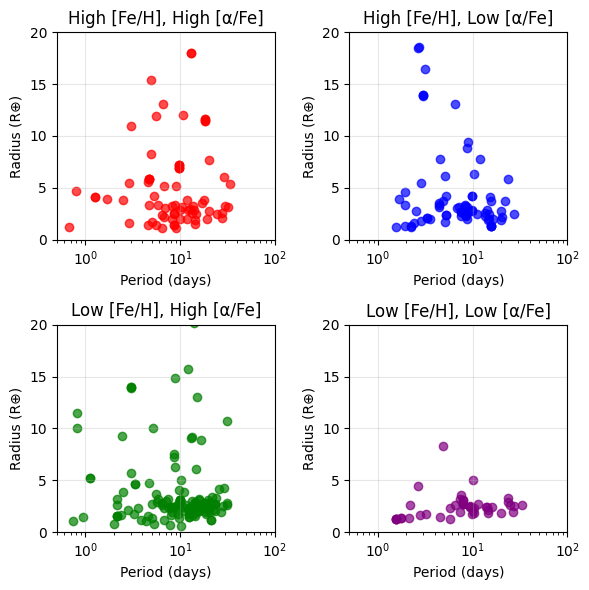

In [100]:
apogee_k2['mean_alpha'] = apogee_k2[['apogee_o_fe','apogee_mg_fe', 'apogee_si_fe', 'apogee_ca_fe', 'apogee_ti_fe']].mean(axis=1)
galah_k2['mean_alpha'] = galah_k2[['galah_o_fe','galah_mg_fe', 'galah_si_fe', 'galah_ca_fe', 'galah_ti_fe']].mean(axis=1)
lamost_k2['mean_alpha'] = lamost_k2[['lamost_mg_fe', 'lamost_si_fe', 'lamost_ca_fe', 'lamost_ti_fe']].mean(axis=1)

fe_h_boundary = 0
alpha_boundary = 0

high_fe_high_alpha_apogee = (apogee_k2['apogee_fe_h'] >= fe_h_boundary) & (apogee_k2['mean_alpha'] >= alpha_boundary)
high_fe_low_alpha_apogee = (apogee_k2['apogee_fe_h'] >= fe_h_boundary) & (apogee_k2['mean_alpha'] < alpha_boundary)
low_fe_high_alpha_apogee = (apogee_k2['apogee_fe_h'] < fe_h_boundary) & (apogee_k2['mean_alpha'] >= alpha_boundary)
low_fe_low_alpha_apogee = (apogee_k2['apogee_fe_h'] < fe_h_boundary) & (apogee_k2['mean_alpha'] < alpha_boundary)

high_fe_high_alpha_galah = (galah_k2['galah_fe_h'] >= fe_h_boundary) & (galah_k2['mean_alpha'] >= alpha_boundary)
# print(sum(high_fe_high_alpha_galah))
high_fe_low_alpha_galah = (galah_k2['galah_fe_h'] >= fe_h_boundary) & (galah_k2['mean_alpha'] < alpha_boundary)
# print(sum(high_fe_low_alpha_galah))
low_fe_high_alpha_galah = (galah_k2['galah_fe_h'] < fe_h_boundary) & (galah_k2['mean_alpha'] >= alpha_boundary)
# print(sum(low_fe_high_alpha_galah))
low_fe_low_alpha_galah = (galah_k2['galah_fe_h'] < fe_h_boundary) & (galah_k2['mean_alpha'] < alpha_boundary)
# print(sum(low_fe_low_alpha_galah))

high_fe_high_alpha_lamost = (lamost_k2['lamost_fe_h'] >= fe_h_boundary) & (lamost_k2['mean_alpha'] >= alpha_boundary)
high_fe_low_alpha_lamost = (lamost_k2['lamost_fe_h'] >= fe_h_boundary) & (lamost_k2['mean_alpha'] < alpha_boundary)
low_fe_high_alpha_lamost= (lamost_k2['lamost_fe_h'] < fe_h_boundary) & (lamost_k2['mean_alpha'] >= alpha_boundary)
low_fe_low_alpha_lamost = (lamost_k2['lamost_fe_h'] < fe_h_boundary) & (lamost_k2['mean_alpha'] < alpha_boundary)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(6, 6))

def plot_planets_for_subset(ax, stars_mask, title, color, df):
    epic_ids = set(df[stars_mask]['EPIC_ID'].unique())
    
    quadrant_planets = planets_df[planets_df['EPIC_ID'].isin(epic_ids)]
    
    if len(quadrant_planets) > 0:
        ax.scatter(quadrant_planets['Period'], quadrant_planets['Rad'], 
                  c=color, alpha=0.7)
        # ax.text(0.05, 0.95, f'N planets = {len(quadrant_planets)}', 
        #         transform=ax.transAxes, fontsize=10)
    
    ax.set_xlabel('Period (days)')
    ax.set_ylabel('Radius (R⊕)')
    ax.set_title(title)
    ax.set_xscale('log')
    ax.grid(True, alpha=0.3)
    
    ax.set_xlim(0.5, 100)
    ax.set_ylim(0, 20)

plot_planets_for_subset(ax1, high_fe_high_alpha_apogee, 
                       'High [Fe/H], High [α/Fe]', 'red', apogee_k2)
plot_planets_for_subset(ax1, high_fe_high_alpha_galah, 
                       'High [Fe/H], High [α/Fe]', 'red', galah_k2)
plot_planets_for_subset(ax1, high_fe_high_alpha_lamost, 
                       'High [Fe/H], High [α/Fe]', 'red', lamost_k2)
plot_planets_for_subset(ax2, high_fe_low_alpha_apogee, 
                       'High [Fe/H], Low [α/Fe]', 'blue', apogee_k2)
plot_planets_for_subset(ax2, high_fe_low_alpha_galah, 
                       'High [Fe/H], Low [α/Fe]', 'blue', galah_k2)
plot_planets_for_subset(ax2, high_fe_low_alpha_lamost, 
                       'High [Fe/H], Low [α/Fe]', 'blue', lamost_k2)
plot_planets_for_subset(ax3, low_fe_high_alpha_apogee, 
                       'Low [Fe/H], High [α/Fe]', 'green', apogee_k2)
plot_planets_for_subset(ax3, low_fe_high_alpha_galah, 
                       'Low [Fe/H], High [α/Fe]', 'green', galah_k2)
plot_planets_for_subset(ax3, low_fe_high_alpha_lamost, 
                       'Low [Fe/H], High [α/Fe]', 'green', lamost_k2)
plot_planets_for_subset(ax4, low_fe_low_alpha_apogee, 
                       'Low [Fe/H], Low [α/Fe]', 'purple', apogee_k2)
plot_planets_for_subset(ax4, low_fe_low_alpha_galah, 
                       'Low [Fe/H], Low [α/Fe]', 'purple', galah_k2)
plot_planets_for_subset(ax4, low_fe_low_alpha_lamost, 
                       'Low [Fe/H], Low [α/Fe]', 'purple', lamost_k2)

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

def get_quadrant_planets(stars_mask, df, planets_df):
    epic_ids = set(df[stars_mask]['EPIC_ID'].unique())
    return planets_df[planets_df['EPIC_ID'].isin(epic_ids)]

def perform_ad_tests(apogee_k2, galah_k2, lamost_k2, planets_df):
    quadrant_planets = {
        'high_fe_high_alpha': [],
        'high_fe_low_alpha': [],
        'low_fe_high_alpha': [],
        'low_fe_low_alpha': []
    }
    
    # Collect planets for high Fe, high alpha
    quadrant_planets['high_fe_high_alpha'].extend(
        get_quadrant_planets(high_fe_high_alpha_apogee, apogee_k2, planets_df)['Rad'].tolist()
    )
    quadrant_planets['high_fe_high_alpha'].extend(
        get_quadrant_planets(high_fe_high_alpha_galah, galah_k2, planets_df)['Rad'].tolist()
    )
    quadrant_planets['high_fe_high_alpha'].extend(
        get_quadrant_planets(high_fe_high_alpha_lamost, lamost_k2, planets_df)['Rad'].tolist()
    )
    
    # Collect planets for high Fe, low alpha
    quadrant_planets['high_fe_low_alpha'].extend(
        get_quadrant_planets(high_fe_low_alpha_apogee, apogee_k2, planets_df)['Rad'].tolist()
    )
    quadrant_planets['high_fe_low_alpha'].extend(
        get_quadrant_planets(high_fe_low_alpha_galah, galah_k2, planets_df)['Rad'].tolist()
    )
    quadrant_planets['high_fe_low_alpha'].extend(
        get_quadrant_planets(high_fe_low_alpha_lamost, lamost_k2, planets_df)['Rad'].tolist()
    )
    
    # Collect planets for low Fe, high alpha
    quadrant_planets['low_fe_high_alpha'].extend(
        get_quadrant_planets(low_fe_high_alpha_apogee, apogee_k2, planets_df)['Rad'].tolist()
    )
    quadrant_planets['low_fe_high_alpha'].extend(
        get_quadrant_planets(low_fe_high_alpha_galah, galah_k2, planets_df)['Rad'].tolist()
    )
    quadrant_planets['low_fe_high_alpha'].extend(
        get_quadrant_planets(low_fe_high_alpha_lamost, lamost_k2, planets_df)['Rad'].tolist()
    )
    
    # Collect planets for low Fe, low alpha
    quadrant_planets['low_fe_low_alpha'].extend(
        get_quadrant_planets(low_fe_low_alpha_apogee, apogee_k2, planets_df)['Rad'].tolist()
    )
    quadrant_planets['low_fe_low_alpha'].extend(
        get_quadrant_planets(low_fe_low_alpha_galah, galah_k2, planets_df)['Rad'].tolist()
    )
    quadrant_planets['low_fe_low_alpha'].extend(
        get_quadrant_planets(low_fe_low_alpha_lamost, lamost_k2, planets_df)['Rad'].tolist()
    )
    
    # Perform Anderson-Darling tests between all pairs
    quadrant_names = list(quadrant_planets.keys())
    results = []
    
    for i in range(len(quadrant_names)):
        for j in range(i + 1, len(quadrant_names)):
            name1 = quadrant_names[i]
            name2 = quadrant_names[j]
            
            # Only perform test if both samples have data
            if len(quadrant_planets[name1]) > 0 and len(quadrant_planets[name2]) > 0:
                statistic, critical_values, significance_level = stats.anderson_ksamp(
                    [quadrant_planets[name1], quadrant_planets[name2]]
                )
                
                results.append({
                    'comparison': f'{name1} vs {name2}',
                    'statistic': statistic,
                    'critical_values': critical_values,
                    'significance_level': significance_level,
                    'n1': len(quadrant_planets[name1]),
                    'n2': len(quadrant_planets[name2])
                })
    
    return results, quadrant_planets

def print_results(results, quadrant_planets):
    print("\nSample sizes:")
    for quadrant, planets in quadrant_planets.items():
        print(f"{quadrant}: {len(planets)} planets")
    
    print("\nAnderson-Darling Test Results:")
    print("-" * 80)
    for result in results:
        print(f"\nComparison: {result['comparison']}")
        print(f"Sample sizes: n1={result['n1']}, n2={result['n2']}")
        print(f"Test statistic: {result['statistic']:.3f}")
        print(f"Significance level: {result['significance_level']:.3f}")
        if result['significance_level'] < 0.05:
            print("Conclusion: Distributions are significantly different (p < 0.05)")
        else:
            print("Conclusion: No significant difference detected (p ≥ 0.05)")

In [123]:
results, quadrant_planets = perform_ad_tests(apogee_k2, galah_k2, lamost_k2, planets_df)

# Print the results
print_results(results, quadrant_planets)


Sample sizes:
high_fe_high_alpha: 77 planets
high_fe_low_alpha: 77 planets
low_fe_high_alpha: 138 planets
low_fe_low_alpha: 55 planets

Anderson-Darling Test Results:
--------------------------------------------------------------------------------

Comparison: high_fe_high_alpha vs high_fe_low_alpha
Sample sizes: n1=77, n2=77
Test statistic: 0.827
Significance level: 0.150
Conclusion: No significant difference detected (p ≥ 0.05)

Comparison: high_fe_high_alpha vs low_fe_high_alpha
Sample sizes: n1=77, n2=138
Test statistic: 4.338
Significance level: 0.006
Conclusion: Distributions are significantly different (p < 0.05)

Comparison: high_fe_high_alpha vs low_fe_low_alpha
Sample sizes: n1=77, n2=55
Test statistic: 12.954
Significance level: 0.001
Conclusion: Distributions are significantly different (p < 0.05)

Comparison: high_fe_low_alpha vs low_fe_high_alpha
Sample sizes: n1=77, n2=138
Test statistic: -0.325
Significance level: 0.250
Conclusion: No significant difference detected (p

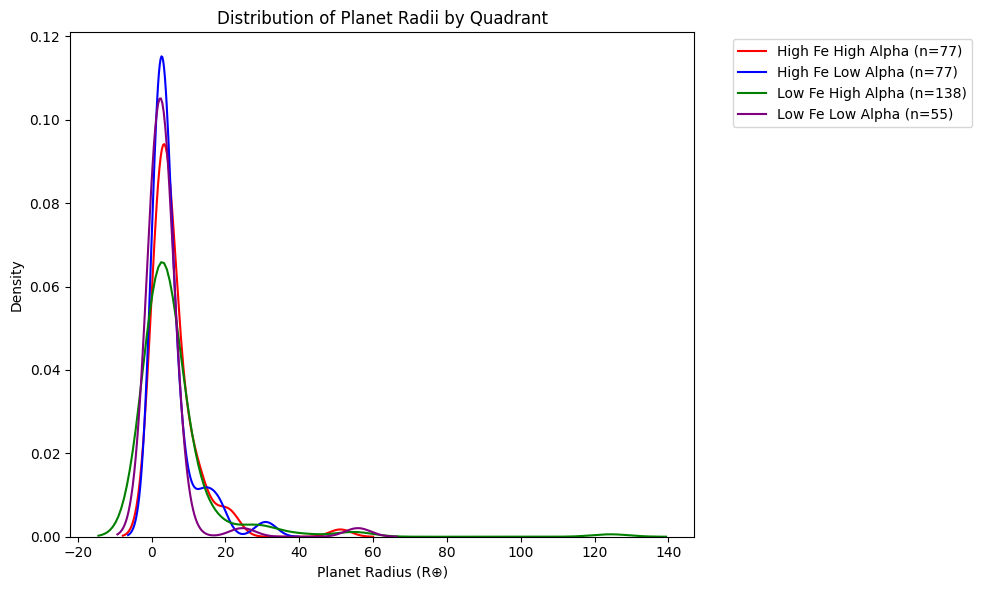

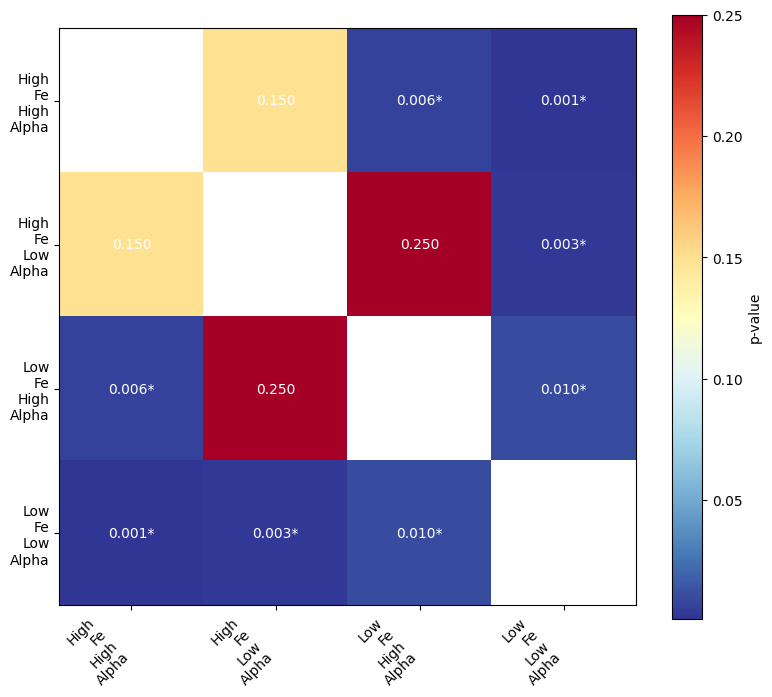

In [129]:
fig, ax = plt.subplots(figsize=(10, 6))
    
colors = {
    'high_fe_high_alpha': 'red',
    'high_fe_low_alpha': 'blue',
    'low_fe_high_alpha': 'green',
    'low_fe_low_alpha': 'purple'
}

# Plot kernel density estimates
for quadrant, radii in quadrant_planets.items():
    if len(radii) > 0:
        sns.kdeplot(data=radii, 
                    label=f"{quadrant.replace('_', ' ').title()} (n={len(radii)})", 
                    color=colors[quadrant], 
                    ax=ax)

ax.set_xlabel('Planet Radius (R⊕)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Planet Radii by Quadrant')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

quadrants = set()
for result in results:
    q1, q2 = result['comparison'].split(' vs ')
    quadrants.add(q1)
    quadrants.add(q2)
quadrants = sorted(list(quadrants))
n_quadrants = len(quadrants)

# Create empty matrix for p-values
p_values = np.full((n_quadrants, n_quadrants), np.nan)

# Fill p-value matrix
for result in results:
    q1, q2 = result['comparison'].split(' vs ')
    i = quadrants.index(q1)
    j = quadrants.index(q2)
    p_values[i, j] = result['significance_level']
    p_values[j, i] = result['significance_level']  # Mirror the matrix
    
# Create figure
fig, ax = plt.subplots(figsize=(8, 7))

# Create heatmap
im = ax.imshow(p_values, cmap='RdYlBu_r')
plt.colorbar(im, ax=ax, label='p-value')
    
# Add quadrant labels
ax.set_xticks(range(n_quadrants))
ax.set_yticks(range(n_quadrants))
labels = [q.replace('_', '\n').title() for q in quadrants]
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

# Add p-values as text annotations
for i in range(n_quadrants):
    for j in range(n_quadrants):
        if not np.isnan(p_values[i, j]):
            text_color = 'white' if p_values[i, j] < 0.3 else 'black'
            sig_marker = '*' if p_values[i, j] < 0.05 else ''
            ax.text(j, i, f'{p_values[i, j]:.3f}{sig_marker}', 
                    ha='center', va='center', color=text_color)

# ax.set_title('Anderson-Darling Test p-values\n* indicates p < 0.05')

plt.tight_layout()
plt.show()

In [130]:
def perform_ks_tests(apogee_k2, galah_k2, lamost_k2, planets_df):
    # Get planet data for each quadrant (reusing your existing get_quadrant_planets function)
    def get_quadrant_planets(stars_mask, df, planets_df):
        epic_ids = set(df[stars_mask]['EPIC_ID'].unique())
        return planets_df[planets_df['EPIC_ID'].isin(epic_ids)]
    
    # Dictionary to store planets for each quadrant
    quadrant_planets = {
        'high_fe_high_alpha': [],
        'high_fe_low_alpha': [],
        'low_fe_high_alpha': [],
        'low_fe_low_alpha': []
    }
    
    # Collect planets for each quadrant from all surveys
    quadrant_planets['high_fe_high_alpha'].extend(
        get_quadrant_planets(high_fe_high_alpha_apogee, apogee_k2, planets_df)['Rad'].tolist() +
        get_quadrant_planets(high_fe_high_alpha_galah, galah_k2, planets_df)['Rad'].tolist() +
        get_quadrant_planets(high_fe_high_alpha_lamost, lamost_k2, planets_df)['Rad'].tolist()
    )
    
    quadrant_planets['high_fe_low_alpha'].extend(
        get_quadrant_planets(high_fe_low_alpha_apogee, apogee_k2, planets_df)['Rad'].tolist() +
        get_quadrant_planets(high_fe_low_alpha_galah, galah_k2, planets_df)['Rad'].tolist() +
        get_quadrant_planets(high_fe_low_alpha_lamost, lamost_k2, planets_df)['Rad'].tolist()
    )
    
    quadrant_planets['low_fe_high_alpha'].extend(
        get_quadrant_planets(low_fe_high_alpha_apogee, apogee_k2, planets_df)['Rad'].tolist() +
        get_quadrant_planets(low_fe_high_alpha_galah, galah_k2, planets_df)['Rad'].tolist() +
        get_quadrant_planets(low_fe_high_alpha_lamost, lamost_k2, planets_df)['Rad'].tolist()
    )
    
    quadrant_planets['low_fe_low_alpha'].extend(
        get_quadrant_planets(low_fe_low_alpha_apogee, apogee_k2, planets_df)['Rad'].tolist() +
        get_quadrant_planets(low_fe_low_alpha_galah, galah_k2, planets_df)['Rad'].tolist() +
        get_quadrant_planets(low_fe_low_alpha_lamost, lamost_k2, planets_df)['Rad'].tolist()
    )
    
    # Perform KS tests between all pairs
    quadrant_names = list(quadrant_planets.keys())
    results = []
    
    for i in range(len(quadrant_names)):
        for j in range(i + 1, len(quadrant_names)):
            name1 = quadrant_names[i]
            name2 = quadrant_names[j]
            
            if len(quadrant_planets[name1]) > 0 and len(quadrant_planets[name2]) > 0:
                statistic, p_value = stats.ks_2samp(
                    quadrant_planets[name1], 
                    quadrant_planets[name2]
                )
                
                results.append({
                    'comparison': f'{name1} vs {name2}',
                    'statistic': statistic,
                    'p_value': p_value,
                    'n1': len(quadrant_planets[name1]),
                    'n2': len(quadrant_planets[name2])
                })
    
    return results, quadrant_planets

def print_ks_results(results, quadrant_planets):
    print("\nSample sizes:")
    for quadrant, planets in quadrant_planets.items():
        print(f"{quadrant}: {len(planets)} planets")
    
    print("\nKolmogorov-Smirnov Test Results:")
    print("-" * 80)
    for result in results:
        print(f"\nComparison: {result['comparison']}")
        print(f"Sample sizes: n1={result['n1']}, n2={result['n2']}")
        print(f"KS statistic: {result['statistic']:.3f}")
        print(f"p-value: {result['p_value']:.3f}")
        if result['p_value'] < 0.05:
            print("Conclusion: Distributions are significantly different (p < 0.05)")
        else:
            print("Conclusion: No significant difference detected (p ≥ 0.05)")

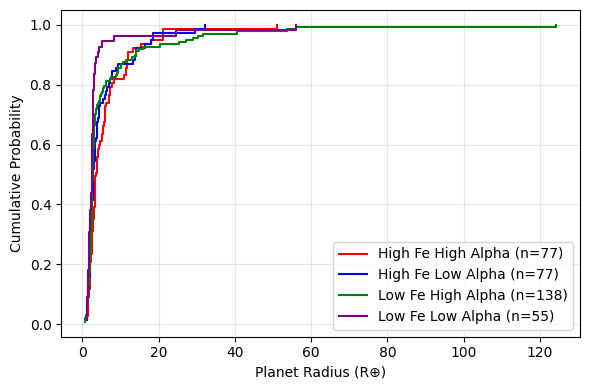

In [133]:
results, quadrant_planets = perform_ks_tests(apogee_k2, galah_k2, lamost_k2, planets_df)
fig, ax = plt.subplots(figsize=(6, 4))
    
colors = {
    'high_fe_high_alpha': 'red',
    'high_fe_low_alpha': 'blue',
    'low_fe_high_alpha': 'green',
    'low_fe_low_alpha': 'purple'
}

for quadrant, radii in quadrant_planets.items():
    if len(radii) > 0:
        # Sort radii and calculate cumulative distribution
        sorted_radii = np.sort(radii)
        cumulative = np.arange(1, len(sorted_radii) + 1) / len(sorted_radii)
        
        ax.step(sorted_radii, cumulative, 
                label=f"{quadrant.replace('_', ' ').title()} (n={len(radii)})",
                color=colors[quadrant], where='post')

ax.set_xlabel('Planet Radius (R⊕)')
ax.set_ylabel('Cumulative Probability')
ax.legend()
ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

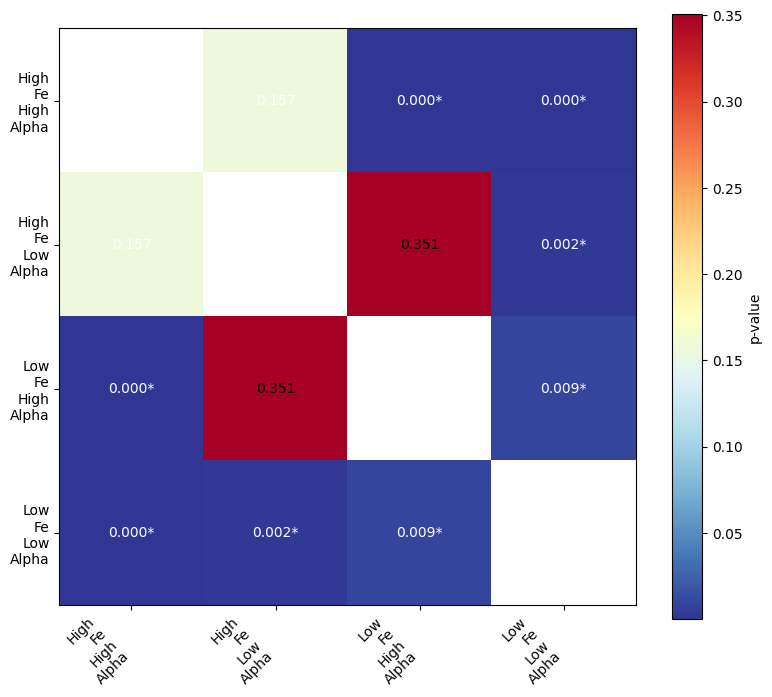

In [135]:
quadrants = set()
for result in results:
    q1, q2 = result['comparison'].split(' vs ')
    quadrants.add(q1)
    quadrants.add(q2)
quadrants = sorted(list(quadrants))
n_quadrants = len(quadrants)
    
p_values = np.full((n_quadrants, n_quadrants), np.nan)

for result in results:
    q1, q2 = result['comparison'].split(' vs ')
    i = quadrants.index(q1)
    j = quadrants.index(q2)
    p_values[i, j] = result['p_value']
    p_values[j, i] = result['p_value']  # Mirror the matrix

fig, ax = plt.subplots(figsize=(8, 7))

im = ax.imshow(p_values, cmap='RdYlBu_r')
plt.colorbar(im, ax=ax, label='p-value')

ax.set_xticks(range(n_quadrants))
ax.set_yticks(range(n_quadrants))
labels = [q.replace('_', '\n').title() for q in quadrants]
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

for i in range(n_quadrants):
    for j in range(n_quadrants):
        if not np.isnan(p_values[i, j]):
            text_color = 'white' if p_values[i, j] < 0.3 else 'black'
            sig_marker = '*' if p_values[i, j] < 0.05 else ''
            ax.text(j, i, f'{p_values[i, j]:.3f}{sig_marker}', 
                    ha='center', va='center', color=text_color)
    
    
plt.tight_layout()
plt.show()

In [103]:
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive

In [107]:
confirmed = NasaExoplanetArchive.query_criteria(
        table="ps",
        select="pl_name,pl_orbper,pl_dens,hostname",
        cache=False
    )

In [119]:
planets_with_density = planets_df.copy()
planets_with_density['Density'] = np.nan

# Convert masked arrays to regular arrays
pl_names = confirmed['pl_name'].filled('')  # Fill masked values with empty string
pl_periods = confirmed['pl_orbper'].filled(np.nan)
pl_densities = confirmed['pl_dens'].filled(np.nan)

In [123]:
str(planet['EPIC_ID'])
f"EPIC {epic_id}"

'EPIC 205950854'

In [128]:
pl_periods[0].value-period

-12.75258511

In [130]:
pl_densities

<Quantity [0.4, nan, nan, ..., nan, nan, nan] g / cm3>

In [131]:
for idx, planet in planets_df.iterrows():
    epic_id = str(planet['EPIC_ID'])
    period = planet['Period']
    
    print(f"\nLooking for planet with EPIC_ID {epic_id}, Period {period}")
    
    # Try different possible name formats for matching
    possible_names = [
        f"K2-{epic_id}",
        f"K2 {epic_id}",
        f"EPIC {epic_id}"
    ]
    
    found = False
    for name in possible_names:
        matches = [i for i, pl_name in enumerate(pl_names) if pl_name.startswith(name)]
        
        if matches:
            print(f"Found {len(matches)} potential matches for {name}")
            for i in matches:
                period_diff = abs(pl_periods[i].value - period)
                print(f"Candidate: {pl_names[i]}, Period: {pl_periods[i].value}, Diff: {period_diff:.3f} days")
                if period_diff < 0.01:  # within 0.1 days
                    planets_with_density.loc[idx, 'Density'] = pl_densities[i].value
                    print(f"Match found! Density: {pl_densities[i].value}")
                    found = True
                    break
        if found:
            break
    if not found:
        print(f"No matches found for EPIC_ID {epic_id}")


Looking for planet with EPIC_ID 201155177, Period 6.689040066
No matches found for EPIC_ID 201155177

Looking for planet with EPIC_ID 201173390, Period 16.99648987
No matches found for EPIC_ID 201173390

Looking for planet with EPIC_ID 201208431, Period 10.00420835
No matches found for EPIC_ID 201208431

Looking for planet with EPIC_ID 201247497, Period 2.754012255
No matches found for EPIC_ID 201247497

Looking for planet with EPIC_ID 201295312, Period 5.656765616
No matches found for EPIC_ID 201295312

Looking for planet with EPIC_ID 201338508, Period 10.93488082
No matches found for EPIC_ID 201338508

Looking for planet with EPIC_ID 201384232, Period 30.94335211
No matches found for EPIC_ID 201384232

Looking for planet with EPIC_ID 201390608, Period 4.906776177
No matches found for EPIC_ID 201390608

Looking for planet with EPIC_ID 201393098, Period 28.68952747
No matches found for EPIC_ID 201393098

Looking for planet with EPIC_ID 201403446, Period 19.15328187
No matches found fo

In [133]:
n_with_density = planets_with_density['Density'].notna().sum()
n_with_density

1

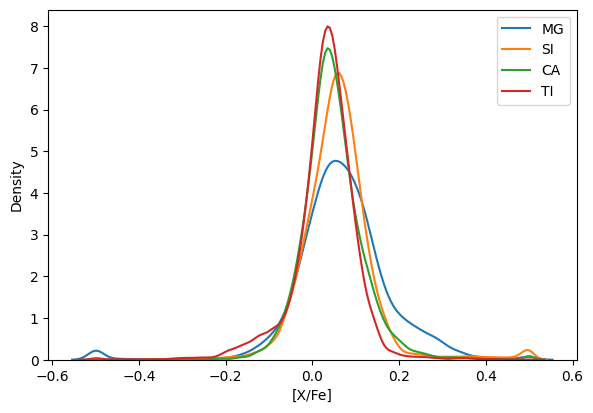

In [145]:
import seaborn as sns
lamost_sample = lamost_k2.sample(n=10000, random_state=42)
alpha_elements = ['lamost_mg_fe', 'lamost_si_fe', 'lamost_ca_fe', 'lamost_ti_fe']
lamost_sample['mean_alpha_fe'] = lamost_sample[alpha_elements].mean(axis=1)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for element in alpha_elements:
    sns.kdeplot(data=lamost_sample, x=element, label=element.split('_')[1].upper())
plt.xlabel('[X/Fe]')
plt.ylabel('Density')
plt.legend()

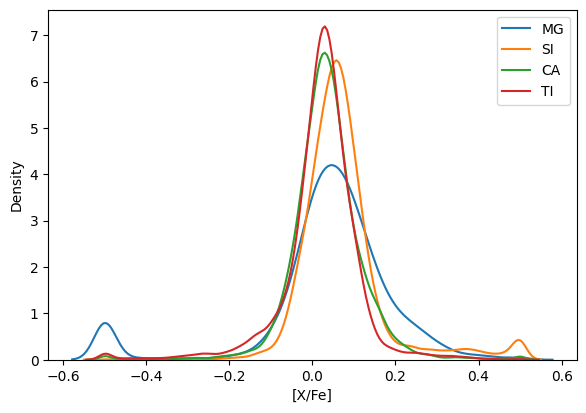

In [144]:
import seaborn as sns
lamost_sample = lamostafgk.sample(n=10000, random_state=42)
alpha_elements = ['lamost_mg_fe', 'lamost_si_fe', 'lamost_ca_fe', 'lamost_ti_fe']
lamost_sample['mean_alpha_fe'] = lamost_sample[alpha_elements].mean(axis=1)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for element in alpha_elements:
    sns.kdeplot(data=lamost_sample, x=element, label=element.split('_')[1].upper())
plt.xlabel('[X/Fe]')
plt.ylabel('Density')
plt.legend()